In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL3BoaWx0cGF0dG9uL3NvdXJjZS9yZXBvcy9waGlscGF0dG9uLmdpdGh1Yi5pbw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/importlib/_bootstrap.py": 1756909683.181072, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/importlib/_bootstrap_external.py": 1756909683.1840236, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/zipimport.py": 1756909682.1390634, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/codecs.py": 1756909681.7841098, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/encodings/aliases.py": 1756909682.4869266, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/encodings/__init__.py": 1756909682.467157, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/encodings/utf_8.py": 1756909682.8301048, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/abc.py": 1756909681.751164, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/io.py": 1756909681.8854132, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/stat.py": 1756909682.0489361, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/_collections_abc.py": 175

In [2]:
%config InlineBackend.figure_format = 'retina'

from jax import random
from jax.scipy.special import expit
from numpyro.contrib.control_flow import scan
from numpyro.infer import NUTS, MCMC, Predictive
import arviz as az
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import numpyro
import numpyro.distributions as dist
import seaborn as sns

# plotting defaults
plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
sns.set_palette("tab10")

# hyperparameters
RANDOM_SEED = 89
MAX_ABUNDANCE = 500

# mcmc hyperparameters
CHAIN_COUNT = 1
WARMUP_COUNT = 500
SAMPLE_COUNT = 1000

# simulation hyperparameters
OCCASION_COUNT = 7
SUPERPOPULATION_SIZE = 400
APPARENT_SURVIVAL = 0.7
INITIAL_PI = 0.34
RECAPTURE_RATE = 0.5
M = 1000

# make the labels on arviz plots nicer
labeller = az.labels.MapLabeller(
    var_name_map={"psi": r"$\psi$", 'gamma':  r"$\gamma$", 'alpha': r'$\alpha$',
                  'epsilon': r"$\epsilon$", 'p':  r"$p$" , 'beta': r'$\beta$',
                  'phi': r'$\phi$', 'alpha_t': r'$\alpha_t$',}
)

def augment_history(history):
    '''Augments a capture histories with all zero histories'''
    number_encountered, occasion_count = history.shape
    number_to_augment = MAX_ABUNDANCE - number_encountered
    all_zero_histories = np.zeros((number_to_augment, occasion_count))
    y_augmented = np.vstack([history, all_zero_histories])
    return y_augmented.astype(np.int32)

def load_dipper_data():
    '''Loads and augments the classic dipper dataset'''
    dipper = np.loadtxt('dipper.csv', delimiter=',').astype(int)
    y_augmented = augment_history(dipper)

    return y_augmented

def sim_js():
    """Simulation code ported from Kery and Schaub (2012), Chapter 10"""

    rng = np.random.default_rng(RANDOM_SEED)
    interval_count = OCCASION_COUNT - 1

    # simulate entry into the population
    pi_rest = (1 - INITIAL_PI) / interval_count
    pi = np.concatenate([[INITIAL_PI], np.full(interval_count, pi_rest)])

    # which occasion did the animal enter in?
    entry_matrix = rng.multinomial(n=1, pvals=pi, size=SUPERPOPULATION_SIZE)
    entry_occasion = entry_matrix.nonzero()[1]
    entrant_count = np.bincount(entry_occasion, minlength=OCCASION_COUNT)

    # zero if the animal has not yet entered and one after it enters
    entry_trajectory = np.maximum.accumulate(entry_matrix, axis=1)

    # flip coins for survival between occasions
    survival_draws = rng.binomial(
        1, APPARENT_SURVIVAL, (SUPERPOPULATION_SIZE, interval_count)
    )

    # add column such that survival between t and t+1 implies alive at t+1
    survival_draws = np.column_stack([np.ones(SUPERPOPULATION_SIZE), survival_draws])

    # ensure that the animal survives until it enters
    is_yet_to_enter = np.arange(OCCASION_COUNT) <= entry_occasion[:, None]
    survival_draws[is_yet_to_enter] = 1

    # once the survival_draws flips to zero the remaining row stays 0
    survival_trajectory = np.cumprod(survival_draws, axis=1)

    # animal has entered AND is still alive
    state = entry_trajectory * survival_trajectory

    # binary matrix of random possible recaptures
    capture = rng.binomial(
        1, RECAPTURE_RATE, (SUPERPOPULATION_SIZE, OCCASION_COUNT)
    )

    # remove the non-detected individuals
    capture_history = state * capture
    was_captured = capture_history.sum(axis=1) > 0
    capture_history = capture_history[was_captured]

    # augment the history with nz animals
    n, _ = capture_history.shape
    nz = M - n
    all_zero_history = np.zeros((nz, OCCASION_COUNT))
    capture_history = np.vstack([capture_history, all_zero_history]).astype(int)

    # return a dict with relevant summary stats
    N_t = state.sum(axis=0)
    return {
        'capture_history': capture_history,
        'N_t': N_t,
        'B': entrant_count,
    }

In [3]:
def js_prior1(capture_history):

    super_size, occasion_count = capture_history.shape

    phi = numpyro.sample('phi', dist.Uniform(0, 1))
    p = numpyro.sample('p', dist.Uniform(0, 1))

    with numpyro.plate('intervals', occasion_count):
        gamma = numpyro.sample('gamma', dist.Uniform(0, 1))

    def transition_and_capture(carry, y_current):

        z_previous, t = carry

        # transition probability matrix
        trans_probs = jnp.array([
            [1 - gamma[t], gamma[t],     0.0],  # From not yet entered
            [         0.0,      phi, 1 - phi],  # From alive
            [         0.0,      0.0,     1.0]   # From dead
        ])

        with numpyro.plate("animals", super_size, dim=-1):

            # transition probabilities depend on current state
            mu_z_current = trans_probs[z_previous]
            z_current = numpyro.sample(
                "state",
                dist.Categorical(dist.util.clamp_probs(mu_z_current)),
                infer={"enumerate": "parallel"}
            )

            mu_y_current = jnp.where(z_current == 1, p, 0.0)
            numpyro.sample(
                "obs",
                dist.Bernoulli(dist.util.clamp_probs(mu_y_current)),
                obs=y_current
            )

        return (z_current, t + 1), None

    # start everyone in the not yet entered state
    state_init = jnp.zeros(super_size, dtype=jnp.int32)
    scan(
        transition_and_capture,
        (state_init, 0),
         jnp.swapaxes(capture_history, 0, 1)
    )

    # calculate derived parameters
    qgamma = 1 - gamma

    # psi is the overall inclusion probability
    cumulative_qgamma = jnp.concatenate([
        jnp.array([1.0]),
        jnp.cumprod(qgamma[:-1])
    ])
    cprob = gamma * cumulative_qgamma
    psi = jnp.sum(cprob)
    numpyro.deterministic('psi', psi)

    # pi for each occasion
    numpyro.deterministic('pi', cprob / psi )

In [4]:
sim_results = sim_js()
capture_histories = sim_results['capture_history']

rng_key = random.PRNGKey(RANDOM_SEED)

# specify which sampler you want to use
nuts_kernel = NUTS(js_prior1)

# configure the MCMC run
mcmc = MCMC(nuts_kernel, num_warmup=WARMUP_COUNT, num_samples=SAMPLE_COUNT,
            num_chains=CHAIN_COUNT)

# run the MCMC then inspect the output
mcmc.run(rng_key, capture_histories)
mcmc.print_summary()

  0%|          | 0/1500 [00:00<?, ?it/s]

warmup:   0%|          | 1/1500 [00:01<31:02,  1.24s/it, 1 steps of size 2.34e+00. acc. prob=0.00]

warmup:   1%|          | 12/1500 [00:01<02:05, 11.83it/s, 31 steps of size 6.52e-02. acc. prob=0.67]

warmup:   1%|          | 18/1500 [00:01<01:29, 16.50it/s, 7 steps of size 1.17e-01. acc. prob=0.72] 

warmup:   2%|▏         | 27/1500 [00:01<00:58, 25.19it/s, 63 steps of size 4.33e-02. acc. prob=0.73]

warmup:   2%|▏         | 36/1500 [00:01<00:44, 33.13it/s, 63 steps of size 3.72e-02. acc. prob=0.74]

warmup:   3%|▎         | 43/1500 [00:01<00:37, 39.32it/s, 15 steps of size 1.16e-01. acc. prob=0.76]

warmup:   3%|▎         | 51/1500 [00:02<00:30, 46.87it/s, 31 steps of size 9.47e-02. acc. prob=0.76]

warmup:   4%|▍         | 58/1500 [00:02<00:29, 48.94it/s, 15 steps of size 1.18e-01. acc. prob=0.77]

warmup:   5%|▍         | 70/1500 [00:02<00:22, 64.38it/s, 15 steps of size 6.58e-02. acc. prob=0.77]

warmup:   5%|▌         | 80/1500 [00:02<00:19, 72.50it/s, 7 steps of size 8.52e-02. acc. prob=0.77] 

warmup:   6%|▌         | 89/1500 [00:02<00:19, 73.22it/s, 15 steps of size 1.28e-01. acc. prob=0.77]

warmup:   7%|▋         | 98/1500 [00:02<00:19, 73.68it/s, 31 steps of size 5.99e-02. acc. prob=0.77]

warmup:   7%|▋         | 106/1500 [00:02<00:18, 74.78it/s, 7 steps of size 4.78e-01. acc. prob=0.77]

warmup:   8%|▊         | 114/1500 [00:02<00:18, 76.03it/s, 63 steps of size 2.22e-01. acc. prob=0.77]

warmup:   8%|▊         | 126/1500 [00:02<00:15, 86.05it/s, 31 steps of size 4.92e-01. acc. prob=0.78]

warmup:   9%|▉         | 140/1500 [00:03<00:13, 100.89it/s, 7 steps of size 8.71e-01. acc. prob=0.78]

warmup:  10%|█         | 155/1500 [00:03<00:12, 111.13it/s, 15 steps of size 2.22e-01. acc. prob=0.78]

warmup:  11%|█         | 167/1500 [00:03<00:12, 107.16it/s, 7 steps of size 6.61e-01. acc. prob=0.78] 

warmup:  12%|█▏        | 178/1500 [00:03<00:12, 107.58it/s, 7 steps of size 6.01e-01. acc. prob=0.78]

warmup:  13%|█▎        | 189/1500 [00:03<00:12, 107.09it/s, 7 steps of size 4.73e-01. acc. prob=0.78]

warmup:  13%|█▎        | 200/1500 [00:03<00:12, 101.22it/s, 15 steps of size 5.46e-01. acc. prob=0.78]

warmup:  14%|█▍        | 212/1500 [00:03<00:12, 105.20it/s, 7 steps of size 4.42e-01. acc. prob=0.78] 

warmup:  15%|█▍        | 224/1500 [00:03<00:11, 107.51it/s, 7 steps of size 3.04e-01. acc. prob=0.78]

warmup:  16%|█▌        | 239/1500 [00:03<00:10, 118.99it/s, 3 steps of size 2.54e-01. acc. prob=0.78]

warmup:  17%|█▋        | 253/1500 [00:04<00:10, 123.07it/s, 7 steps of size 5.27e-01. acc. prob=0.78]

warmup:  18%|█▊        | 266/1500 [00:04<00:10, 122.38it/s, 7 steps of size 5.49e-01. acc. prob=0.78]

warmup:  19%|█▊        | 279/1500 [00:04<00:10, 111.14it/s, 3 steps of size 1.14e-01. acc. prob=0.78]

warmup:  19%|█▉        | 292/1500 [00:04<00:10, 114.81it/s, 7 steps of size 6.79e-01. acc. prob=0.78]

warmup:  20%|██        | 304/1500 [00:04<00:10, 111.66it/s, 7 steps of size 4.70e-01. acc. prob=0.78]

warmup:  21%|██        | 318/1500 [00:04<00:10, 112.22it/s, 31 steps of size 2.74e-01. acc. prob=0.78]

warmup:  22%|██▏       | 334/1500 [00:04<00:09, 121.26it/s, 15 steps of size 2.92e-01. acc. prob=0.78]

warmup:  23%|██▎       | 350/1500 [00:04<00:08, 130.70it/s, 7 steps of size 4.49e-01. acc. prob=0.78] 

warmup:  24%|██▍       | 364/1500 [00:04<00:08, 130.77it/s, 7 steps of size 5.78e-01. acc. prob=0.79]

warmup:  25%|██▌       | 381/1500 [00:05<00:07, 141.00it/s, 15 steps of size 4.18e-01. acc. prob=0.79]

warmup:  26%|██▋       | 396/1500 [00:05<00:07, 140.10it/s, 7 steps of size 4.64e-01. acc. prob=0.79] 

warmup:  28%|██▊       | 417/1500 [00:05<00:06, 155.85it/s, 15 steps of size 3.87e-01. acc. prob=0.79]

warmup:  29%|██▉       | 433/1500 [00:05<00:07, 146.38it/s, 7 steps of size 6.71e-01. acc. prob=0.79] 

warmup:  30%|██▉       | 448/1500 [00:05<00:07, 147.23it/s, 7 steps of size 5.50e-01. acc. prob=0.79]

warmup:  31%|███       | 463/1500 [00:05<00:08, 123.21it/s, 31 steps of size 3.18e-01. acc. prob=0.79]

warmup:  32%|███▏      | 476/1500 [00:05<00:08, 122.50it/s, 15 steps of size 3.96e-01. acc. prob=0.79]

warmup:  33%|███▎      | 489/1500 [00:05<00:08, 119.97it/s, 15 steps of size 4.11e-01. acc. prob=0.79]

sample:  33%|███▎      | 502/1500 [00:05<00:08, 121.20it/s, 7 steps of size 4.35e-01. acc. prob=0.99] 

sample:  34%|███▍      | 516/1500 [00:06<00:07, 126.16it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  35%|███▌      | 532/1500 [00:06<00:07, 134.66it/s, 7 steps of size 4.35e-01. acc. prob=0.92] 

sample:  36%|███▋      | 546/1500 [00:06<00:07, 120.81it/s, 15 steps of size 4.35e-01. acc. prob=0.93]

sample:  37%|███▋      | 559/1500 [00:06<00:07, 119.78it/s, 15 steps of size 4.35e-01. acc. prob=0.93]

sample:  38%|███▊      | 572/1500 [00:06<00:07, 119.04it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  39%|███▉      | 585/1500 [00:06<00:08, 110.80it/s, 7 steps of size 4.35e-01. acc. prob=0.92] 

sample:  40%|████      | 602/1500 [00:06<00:07, 123.56it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  41%|████      | 616/1500 [00:06<00:06, 126.67it/s, 7 steps of size 4.35e-01. acc. prob=0.92] 

sample:  42%|████▏     | 630/1500 [00:06<00:06, 129.04it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  43%|████▎     | 644/1500 [00:07<00:06, 126.21it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  44%|████▍     | 657/1500 [00:07<00:06, 125.68it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  45%|████▍     | 670/1500 [00:07<00:06, 123.12it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  46%|████▌     | 683/1500 [00:07<00:06, 121.34it/s, 7 steps of size 4.35e-01. acc. prob=0.92] 

sample:  46%|████▋     | 697/1500 [00:07<00:06, 126.44it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  47%|████▋     | 710/1500 [00:07<00:06, 123.64it/s, 23 steps of size 4.35e-01. acc. prob=0.92]

sample:  48%|████▊     | 724/1500 [00:07<00:06, 127.03it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  49%|████▉     | 737/1500 [00:07<00:06, 113.66it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  50%|████▉     | 749/1500 [00:07<00:06, 113.87it/s, 7 steps of size 4.35e-01. acc. prob=0.92] 

sample:  51%|█████     | 761/1500 [00:08<00:06, 113.99it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  52%|█████▏    | 774/1500 [00:08<00:06, 117.03it/s, 7 steps of size 4.35e-01. acc. prob=0.92] 

sample:  53%|█████▎    | 789/1500 [00:08<00:05, 125.27it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  53%|█████▎    | 802/1500 [00:08<00:05, 125.11it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  54%|█████▍    | 815/1500 [00:08<00:05, 118.32it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  55%|█████▌    | 832/1500 [00:08<00:05, 127.83it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  56%|█████▋    | 845/1500 [00:08<00:05, 119.26it/s, 7 steps of size 4.35e-01. acc. prob=0.92] 

sample:  57%|█████▋    | 859/1500 [00:08<00:05, 123.65it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  58%|█████▊    | 872/1500 [00:08<00:05, 119.70it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  59%|█████▉    | 885/1500 [00:09<00:05, 114.68it/s, 7 steps of size 4.35e-01. acc. prob=0.92] 

sample:  60%|██████    | 900/1500 [00:09<00:04, 123.11it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  61%|██████    | 913/1500 [00:09<00:04, 123.51it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  62%|██████▏   | 926/1500 [00:09<00:04, 121.61it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  63%|██████▎   | 941/1500 [00:09<00:04, 128.37it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  64%|██████▎   | 954/1500 [00:09<00:04, 122.76it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  64%|██████▍   | 967/1500 [00:09<00:04, 123.16it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  65%|██████▌   | 980/1500 [00:09<00:04, 120.72it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  66%|██████▌   | 993/1500 [00:09<00:04, 122.69it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  67%|██████▋   | 1006/1500 [00:10<00:04, 123.14it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  68%|██████▊   | 1019/1500 [00:10<00:03, 123.50it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  69%|██████▉   | 1033/1500 [00:10<00:03, 124.53it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  70%|██████▉   | 1048/1500 [00:10<00:03, 128.27it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  71%|███████   | 1061/1500 [00:10<00:03, 120.49it/s, 7 steps of size 4.35e-01. acc. prob=0.92] 

sample:  72%|███████▏  | 1075/1500 [00:10<00:03, 124.60it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  73%|███████▎  | 1088/1500 [00:10<00:03, 124.61it/s, 7 steps of size 4.35e-01. acc. prob=0.92] 

sample:  73%|███████▎  | 1101/1500 [00:10<00:03, 124.64it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  74%|███████▍  | 1115/1500 [00:10<00:03, 127.68it/s, 7 steps of size 4.35e-01. acc. prob=0.92] 

sample:  75%|███████▌  | 1129/1500 [00:11<00:02, 129.82it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  76%|███████▌  | 1143/1500 [00:11<00:02, 126.58it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  77%|███████▋  | 1156/1500 [00:11<00:02, 124.54it/s, 7 steps of size 4.35e-01. acc. prob=0.92] 

sample:  78%|███████▊  | 1170/1500 [00:11<00:02, 127.58it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  79%|███████▉  | 1183/1500 [00:11<00:02, 121.35it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  80%|███████▉  | 1196/1500 [00:11<00:02, 115.44it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  81%|████████  | 1210/1500 [00:11<00:02, 120.86it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  82%|████████▏ | 1223/1500 [00:11<00:02, 113.24it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  82%|████████▏ | 1236/1500 [00:11<00:02, 114.24it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  83%|████████▎ | 1249/1500 [00:12<00:02, 115.13it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  84%|████████▍ | 1261/1500 [00:12<00:02, 110.90it/s, 7 steps of size 4.35e-01. acc. prob=0.92] 

sample:  85%|████████▍ | 1274/1500 [00:12<00:01, 115.09it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  86%|████████▌ | 1288/1500 [00:12<00:01, 120.48it/s, 7 steps of size 4.35e-01. acc. prob=0.92] 

sample:  87%|████████▋ | 1303/1500 [00:12<00:01, 127.62it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  88%|████████▊ | 1318/1500 [00:12<00:01, 132.31it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  89%|████████▉ | 1332/1500 [00:12<00:01, 128.38it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  90%|████████▉ | 1347/1500 [00:12<00:01, 133.24it/s, 7 steps of size 4.35e-01. acc. prob=0.92] 

sample:  91%|█████████ | 1361/1500 [00:12<00:01, 131.39it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  92%|█████████▏| 1375/1500 [00:13<00:00, 125.42it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  93%|█████████▎| 1389/1500 [00:13<00:00, 127.92it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  94%|█████████▎| 1404/1500 [00:13<00:00, 132.57it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  95%|█████████▍| 1418/1500 [00:13<00:00, 126.22it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  95%|█████████▌| 1431/1500 [00:13<00:00, 125.74it/s, 7 steps of size 4.35e-01. acc. prob=0.92]

sample:  96%|█████████▋| 1444/1500 [00:13<00:00, 118.97it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample:  97%|█████████▋| 1456/1500 [00:13<00:00, 117.28it/s, 7 steps of size 4.35e-01. acc. prob=0.92] 

sample:  98%|█████████▊| 1469/1500 [00:13<00:00, 115.09it/s, 31 steps of size 4.35e-01. acc. prob=0.92]

sample:  99%|█████████▉| 1482/1500 [00:13<00:00, 117.32it/s, 7 steps of size 4.35e-01. acc. prob=0.92] 

sample: 100%|█████████▉| 1496/1500 [00:14<00:00, 122.37it/s, 15 steps of size 4.35e-01. acc. prob=0.92]

sample: 100%|██████████| 1500/1500 [00:14<00:00, 106.47it/s, 7 steps of size 4.35e-01. acc. prob=0.92] 


                mean       std    median      5.0%     95.0%     n_eff     r_hat
  gamma[0]      0.14      0.02      0.14      0.10      0.17    655.69      1.00
  gamma[1]      0.08      0.02      0.08      0.05      0.11    654.22      1.00
  gamma[2]      0.07      0.02      0.07      0.04      0.10    942.52      1.00
  gamma[3]      0.06      0.02      0.06      0.03      0.09    864.72      1.00
  gamma[4]      0.06      0.02      0.06      0.03      0.09    812.44      1.00
  gamma[5]      0.06      0.02      0.06      0.03      0.09   1061.40      1.00
  gamma[6]      0.05      0.02      0.05      0.02      0.08    965.17      1.00
         p      0.49      0.04      0.49      0.43      0.55    635.77      1.00
       phi      0.69      0.03      0.69      0.65      0.73    653.80      1.00

Number of divergences: 0


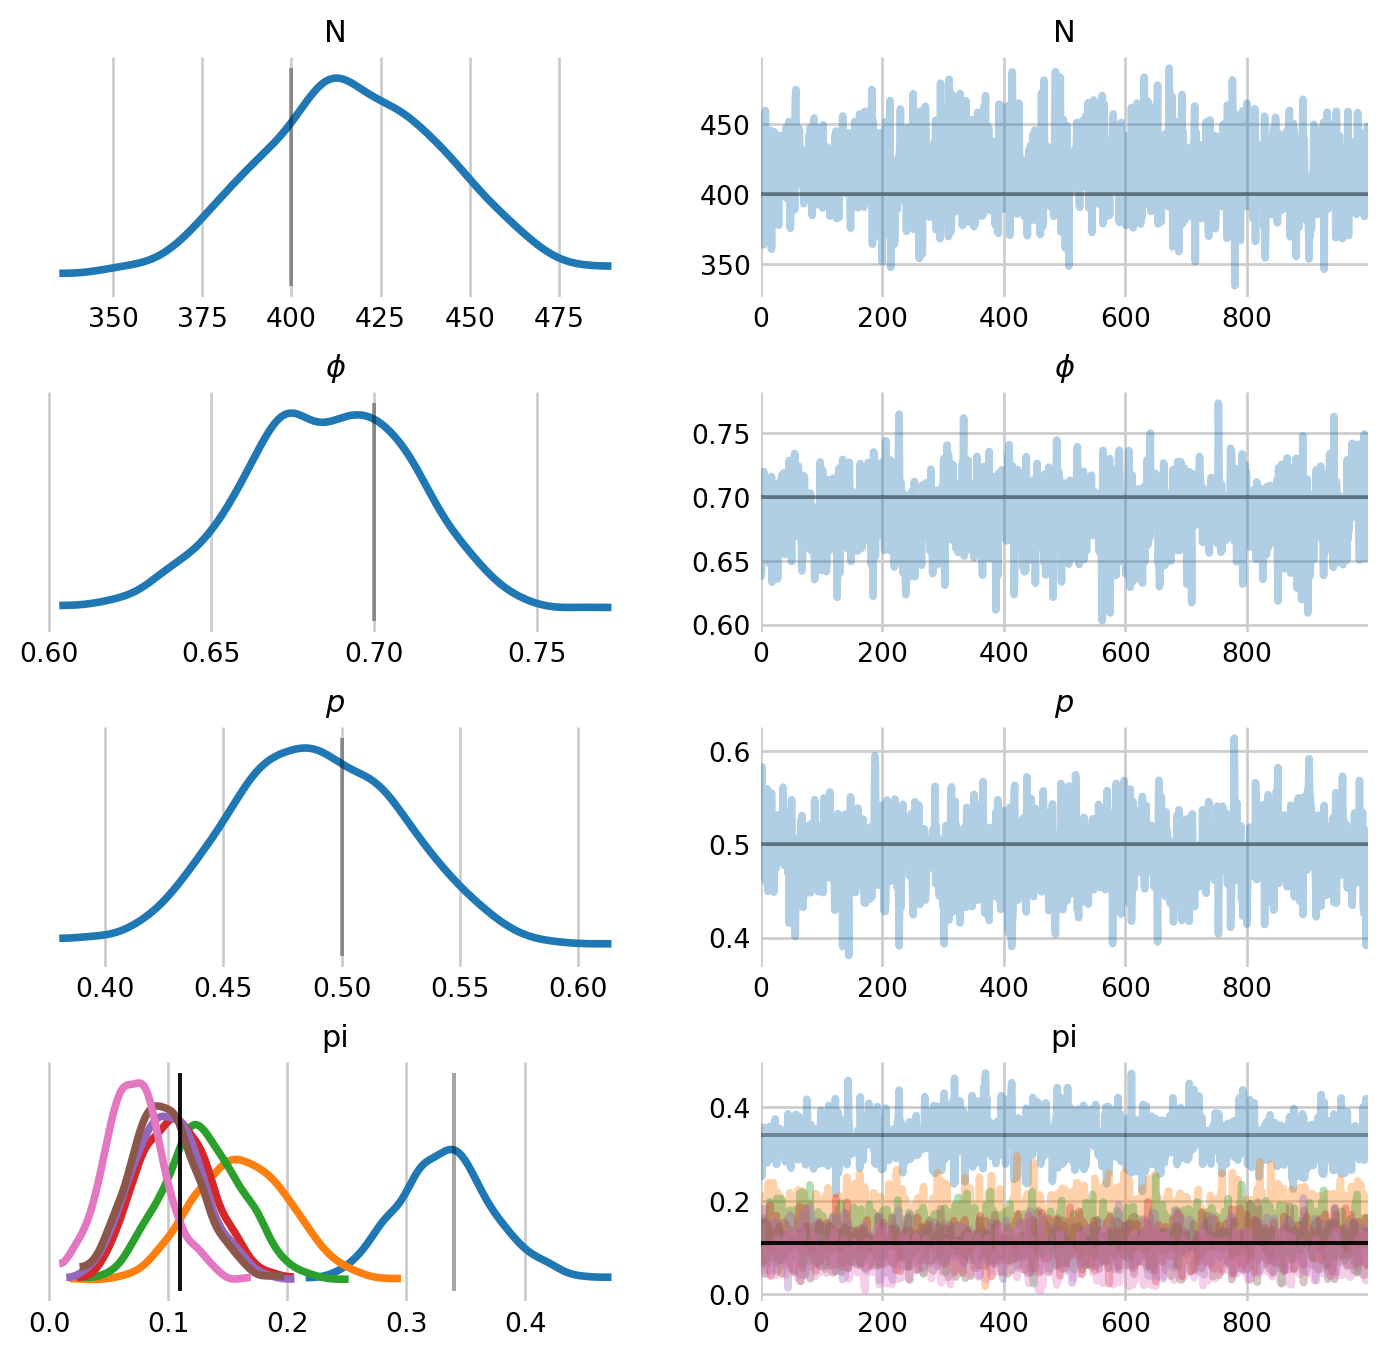

In [5]:
#| fig-cap: Traceplots for multi-state Jolly-Seber model
#| label: fig-trace-ms

# create the inference data object for arviz
samples = mcmc.get_samples(group_by_chain=True)
idata = az.from_dict(samples)

# simplest way to compute the superpopulation size
idata.posterior['N'] = idata.posterior['psi'] * M

pi_rest = (1 - INITIAL_PI) / (OCCASION_COUNT - 1)
pi = np.concat([[INITIAL_PI], np.full(OCCASION_COUNT - 1, pi_rest)])

# generate traceplots for parameters
az.plot_trace(
    idata,
    figsize=(8,8),
    var_names=['N', 'phi', 'p', 'pi'],
    labeller=labeller,
    lines=[("phi", {}, [APPARENT_SURVIVAL]), ("p", {}, [RECAPTURE_RATE]),
           ("pi", {}, pi), ("N", {}, [SUPERPOPULATION_SIZE])],
)
plt.subplots_adjust(hspace=0.4)

In [6]:
def sample_z(model, posterior_samples, capture_history):
    '''Samples the posterior predictive distribution for z given the histories'''

    # initialize the posterior predictive distribution
    predictive = Predictive(
        model,
        posterior_samples=posterior_samples,
        return_sites=["state"]
    )

    # sample z
    rng_key = random.PRNGKey(RANDOM_SEED)
    latent_samples = predictive(rng_key, capture_history)
    return latent_samples["state"]

# generate the posterior predictive distribution for N
samples = mcmc.get_samples()
z = sample_z(js_prior1, samples, capture_histories)
ever_alive = z.max(axis=1) > 0
samples['N'] = ever_alive.sum(axis=1)

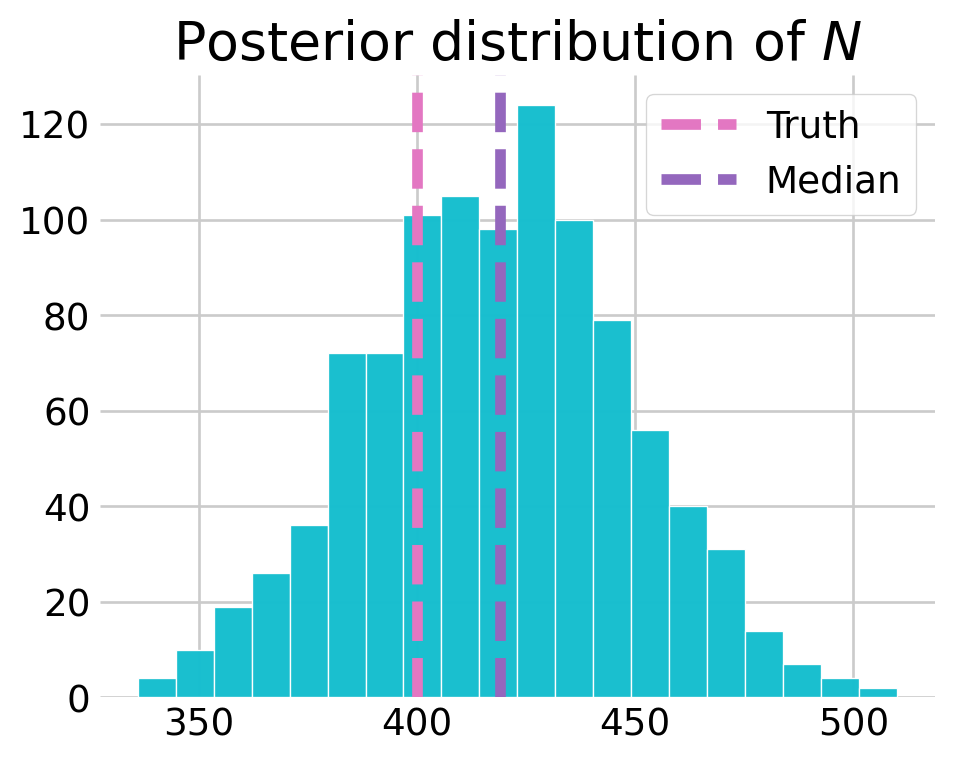

In [7]:
#| fig-cap: Posterior distribution of $N$ with multi-state Jolly-Seber model.
#| label: fig-n-prior1

# create the plot
fig, ax = plt.subplots(figsize=(5, 4), sharey=True)

ax.hist(samples['N'], bins=20, fc='tab:cyan', ec='w', alpha=0.99)

ax.set_title(r'Posterior distribution of $N$')
ax.axvline(SUPERPOPULATION_SIZE, linestyle='--', color='tab:pink', label='Truth')
ax.axvline(np.median(samples['N']), linestyle='--', color='tab:purple', label='Median')

ax.legend()

plt.show()

In [8]:
def js_prior2(capture_history):

    super_size, occasion_count = capture_history.shape

    phi = numpyro.sample('phi', dist.Uniform(0, 1))
    p = numpyro.sample('p', dist.Uniform(0, 1))

    # parameterize the  entry probabilities in terms of pi and psi
    psi = numpyro.sample('psi', dist.Uniform(0, 1))
    pi = numpyro.sample('pi', dist.Dirichlet(jnp.ones(occasion_count)))

    # initial occasion: gamma_0 = psi * pi_0
    # otherwise       : gamma_t = psi * pi_t / (1 - sum(pi_[t - 1]))
    denominators = jnp.concatenate([
        jnp.array([1.0]),          # for t=0, just psi * pi_0
        1.0 - jnp.cumsum(pi)[:-1]
    ])
    gamma = numpyro.deterministic('gamma', psi * pi / denominators)

    def transition_and_capture(carry, y_current):

        z_previous, t = carry

        trans_probs = jnp.array([
            [1 - gamma[t], gamma[t], 0.0],  # From not yet entered
            [0.0, phi, 1 - phi],            # From alive
            [0.0, 0.0, 1.0]                 # From dead
        ])

        with numpyro.plate("animals", super_size, dim=-1):

            mu_z_current = trans_probs[z_previous]
            z_current = numpyro.sample(
                "state",
                dist.Categorical(dist.util.clamp_probs(mu_z_current)),
                infer={"enumerate": "parallel"}
            )

            mu_y_current = jnp.where(z_current == 1, p, 0.0)
            numpyro.sample(
                "obs",
                dist.Bernoulli(dist.util.clamp_probs(mu_y_current)),
                obs=y_current
            )

        return (z_current, t + 1), None

    # start everyone in the not yet entered state
    state_init = jnp.zeros(super_size, dtype=jnp.int32)
    scan(
        transition_and_capture,
        (state_init, 0),
         jnp.swapaxes(capture_history, 0, 1)
    )

In [9]:
# specify which sampler you want to use
nuts_kernel = NUTS(js_prior2)

# configure the MCMC run
mcmc = MCMC(nuts_kernel, num_warmup=WARMUP_COUNT, num_samples=SAMPLE_COUNT,
            num_chains=CHAIN_COUNT)

# run the MCMC then inspect the output
mcmc.run(rng_key, capture_histories)
mcmc.print_summary()

  0%|          | 0/1500 [00:00<?, ?it/s]

warmup:   0%|          | 1/1500 [00:01<33:34,  1.34s/it, 1 steps of size 2.34e+00. acc. prob=0.00]

warmup:   1%|          | 13/1500 [00:01<02:02, 12.19it/s, 4 steps of size 2.88e-02. acc. prob=0.66]

warmup:   1%|▏         | 20/1500 [00:01<01:29, 16.45it/s, 63 steps of size 5.34e-02. acc. prob=0.71]

warmup:   2%|▏         | 26/1500 [00:01<01:10, 20.80it/s, 31 steps of size 6.76e-02. acc. prob=0.73]

warmup:   2%|▏         | 31/1500 [00:01<01:04, 22.86it/s, 31 steps of size 8.08e-02. acc. prob=0.74]

warmup:   2%|▏         | 36/1500 [00:02<00:54, 27.11it/s, 15 steps of size 3.52e-02. acc. prob=0.74]

warmup:   3%|▎         | 41/1500 [00:02<00:48, 30.30it/s, 3 steps of size 2.29e-02. acc. prob=0.74] 

warmup:   3%|▎         | 46/1500 [00:02<00:46, 31.61it/s, 31 steps of size 8.52e-02. acc. prob=0.76]

warmup:   3%|▎         | 52/1500 [00:02<00:39, 36.95it/s, 31 steps of size 1.23e-01. acc. prob=0.76]

warmup:   4%|▍         | 57/1500 [00:02<00:38, 37.43it/s, 15 steps of size 3.10e-02. acc. prob=0.76]

warmup:   4%|▍         | 62/1500 [00:02<00:39, 36.63it/s, 31 steps of size 1.27e-01. acc. prob=0.77]

warmup:   4%|▍         | 67/1500 [00:02<00:36, 38.84it/s, 31 steps of size 1.27e-01. acc. prob=0.77]

warmup:   5%|▍         | 72/1500 [00:03<00:40, 35.03it/s, 15 steps of size 5.32e-02. acc. prob=0.76]

warmup:   5%|▌         | 77/1500 [00:03<00:37, 38.16it/s, 31 steps of size 8.73e-02. acc. prob=0.77]

warmup:   5%|▌         | 82/1500 [00:03<00:37, 38.06it/s, 31 steps of size 8.96e-02. acc. prob=0.77]

warmup:   6%|▌         | 88/1500 [00:03<00:33, 41.74it/s, 63 steps of size 4.30e-02. acc. prob=0.77]

warmup:   6%|▌         | 93/1500 [00:03<00:35, 39.37it/s, 31 steps of size 8.07e-02. acc. prob=0.77]

warmup:   7%|▋         | 100/1500 [00:03<00:31, 44.17it/s, 31 steps of size 5.82e-02. acc. prob=0.77]

warmup:   7%|▋         | 105/1500 [00:03<00:31, 43.71it/s, 15 steps of size 4.26e-01. acc. prob=0.77]

warmup:   8%|▊         | 115/1500 [00:03<00:24, 57.53it/s, 15 steps of size 4.49e-01. acc. prob=0.77]

warmup:   8%|▊         | 124/1500 [00:03<00:21, 62.79it/s, 31 steps of size 2.37e-01. acc. prob=0.77]

warmup:   9%|▊         | 131/1500 [00:04<00:21, 63.36it/s, 15 steps of size 5.94e-01. acc. prob=0.78]

warmup:   9%|▉         | 141/1500 [00:04<00:18, 72.65it/s, 15 steps of size 4.62e-01. acc. prob=0.78]

warmup:  10%|▉         | 149/1500 [00:04<00:18, 73.70it/s, 7 steps of size 1.56e-01. acc. prob=0.78] 

warmup:  10%|█         | 157/1500 [00:04<00:18, 72.96it/s, 15 steps of size 2.14e-01. acc. prob=0.77]

warmup:  11%|█         | 168/1500 [00:04<00:16, 80.92it/s, 15 steps of size 5.07e-01. acc. prob=0.78]

warmup:  12%|█▏        | 177/1500 [00:04<00:17, 75.79it/s, 15 steps of size 4.33e-01. acc. prob=0.78]

warmup:  12%|█▏        | 187/1500 [00:04<00:16, 81.81it/s, 7 steps of size 2.05e-01. acc. prob=0.78] 

warmup:  13%|█▎        | 196/1500 [00:04<00:17, 74.77it/s, 15 steps of size 5.31e-01. acc. prob=0.78]

warmup:  14%|█▎        | 204/1500 [00:05<00:17, 73.81it/s, 31 steps of size 2.19e-01. acc. prob=0.78]

warmup:  14%|█▍        | 216/1500 [00:05<00:15, 83.14it/s, 31 steps of size 3.21e-01. acc. prob=0.78]

warmup:  15%|█▌        | 225/1500 [00:05<00:15, 80.38it/s, 63 steps of size 2.45e-01. acc. prob=0.78]

warmup:  16%|█▌        | 236/1500 [00:05<00:14, 87.66it/s, 7 steps of size 5.49e-01. acc. prob=0.78] 

warmup:  17%|█▋        | 250/1500 [00:05<00:12, 99.73it/s, 15 steps of size 3.49e-01. acc. prob=0.78]

warmup:  17%|█▋        | 261/1500 [00:05<00:13, 92.38it/s, 15 steps of size 4.38e-01. acc. prob=0.78]

warmup:  18%|█▊        | 271/1500 [00:05<00:14, 87.27it/s, 3 steps of size 1.31e-01. acc. prob=0.78] 

warmup:  19%|█▊        | 280/1500 [00:05<00:15, 78.57it/s, 7 steps of size 5.35e-01. acc. prob=0.78]

warmup:  19%|█▉        | 289/1500 [00:06<00:15, 76.54it/s, 15 steps of size 5.51e-01. acc. prob=0.78]

warmup:  20%|█▉        | 299/1500 [00:06<00:14, 81.54it/s, 15 steps of size 4.82e-01. acc. prob=0.78]

warmup:  21%|██        | 309/1500 [00:06<00:13, 86.31it/s, 15 steps of size 2.61e-01. acc. prob=0.78]

warmup:  21%|██▏       | 321/1500 [00:06<00:12, 94.27it/s, 15 steps of size 3.53e-01. acc. prob=0.78]

warmup:  22%|██▏       | 333/1500 [00:06<00:11, 99.81it/s, 15 steps of size 2.73e-01. acc. prob=0.78]

warmup:  23%|██▎       | 344/1500 [00:06<00:11, 101.89it/s, 7 steps of size 5.62e-01. acc. prob=0.78]

warmup:  24%|██▎       | 356/1500 [00:06<00:11, 103.57it/s, 15 steps of size 5.05e-01. acc. prob=0.78]

warmup:  25%|██▍       | 371/1500 [00:06<00:09, 112.97it/s, 15 steps of size 4.02e-01. acc. prob=0.79]

warmup:  26%|██▌       | 383/1500 [00:06<00:09, 113.26it/s, 7 steps of size 2.06e-01. acc. prob=0.78] 

warmup:  26%|██▋       | 395/1500 [00:06<00:10, 110.37it/s, 7 steps of size 2.78e-01. acc. prob=0.79]

warmup:  27%|██▋       | 407/1500 [00:07<00:09, 112.00it/s, 15 steps of size 5.07e-01. acc. prob=0.79]

warmup:  28%|██▊       | 422/1500 [00:07<00:08, 120.42it/s, 15 steps of size 4.29e-01. acc. prob=0.79]

warmup:  29%|██▉       | 435/1500 [00:07<00:09, 115.22it/s, 15 steps of size 2.87e-01. acc. prob=0.79]

warmup:  30%|██▉       | 447/1500 [00:07<00:09, 111.79it/s, 7 steps of size 4.57e-01. acc. prob=0.79] 

warmup:  31%|███       | 459/1500 [00:07<00:10, 97.40it/s, 7 steps of size 4.77e-01. acc. prob=0.79] 

warmup:  31%|███▏      | 470/1500 [00:07<00:11, 92.86it/s, 63 steps of size 1.15e-01. acc. prob=0.78]

warmup:  32%|███▏      | 480/1500 [00:07<00:14, 69.15it/s, 3 steps of size 1.83e-01. acc. prob=0.79] 

warmup:  33%|███▎      | 489/1500 [00:08<00:14, 69.43it/s, 31 steps of size 1.63e-01. acc. prob=0.79]

warmup:  33%|███▎      | 498/1500 [00:08<00:13, 72.81it/s, 15 steps of size 3.74e-01. acc. prob=0.79]

sample:  34%|███▍      | 508/1500 [00:08<00:12, 78.42it/s, 7 steps of size 3.56e-01. acc. prob=0.93] 

sample:  34%|███▍      | 517/1500 [00:08<00:12, 80.24it/s, 15 steps of size 3.56e-01. acc. prob=0.92]

sample:  35%|███▌      | 530/1500 [00:08<00:10, 92.06it/s, 7 steps of size 3.56e-01. acc. prob=0.93] 

sample:  36%|███▌      | 540/1500 [00:08<00:10, 91.01it/s, 15 steps of size 3.56e-01. acc. prob=0.92]

sample:  37%|███▋      | 550/1500 [00:08<00:10, 88.72it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  37%|███▋      | 561/1500 [00:08<00:10, 92.94it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  38%|███▊      | 571/1500 [00:08<00:09, 93.25it/s, 7 steps of size 3.56e-01. acc. prob=0.93] 

sample:  39%|███▊      | 581/1500 [00:09<00:10, 87.19it/s, 23 steps of size 3.56e-01. acc. prob=0.93]

sample:  39%|███▉      | 592/1500 [00:09<00:09, 91.88it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  40%|████      | 602/1500 [00:09<00:09, 92.50it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  41%|████      | 612/1500 [00:09<00:09, 91.36it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  41%|████▏     | 622/1500 [00:09<00:09, 88.99it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  42%|████▏     | 633/1500 [00:09<00:09, 93.27it/s, 7 steps of size 3.56e-01. acc. prob=0.93] 

sample:  43%|████▎     | 643/1500 [00:09<00:09, 94.37it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  44%|████▎     | 654/1500 [00:09<00:08, 97.15it/s, 7 steps of size 3.56e-01. acc. prob=0.93] 

sample:  44%|████▍     | 665/1500 [00:09<00:08, 97.40it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  45%|████▌     | 675/1500 [00:10<00:08, 98.09it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  46%|████▌     | 685/1500 [00:10<00:08, 95.14it/s, 15 steps of size 3.56e-01. acc. prob=0.94]

sample:  46%|████▋     | 696/1500 [00:10<00:08, 97.73it/s, 7 steps of size 3.56e-01. acc. prob=0.94] 

sample:  47%|████▋     | 706/1500 [00:10<00:08, 91.63it/s, 15 steps of size 3.56e-01. acc. prob=0.94]

sample:  48%|████▊     | 717/1500 [00:10<00:08, 93.52it/s, 15 steps of size 3.56e-01. acc. prob=0.94]

sample:  48%|████▊     | 727/1500 [00:10<00:08, 92.04it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  49%|████▉     | 738/1500 [00:10<00:07, 95.52it/s, 7 steps of size 3.56e-01. acc. prob=0.93] 

sample:  50%|████▉     | 748/1500 [00:10<00:07, 95.04it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  51%|█████     | 759/1500 [00:10<00:07, 95.92it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  51%|█████▏    | 769/1500 [00:11<00:07, 95.31it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  52%|█████▏    | 779/1500 [00:11<00:07, 93.27it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  53%|█████▎    | 789/1500 [00:11<00:07, 93.51it/s, 7 steps of size 3.56e-01. acc. prob=0.94] 

sample:  53%|█████▎    | 799/1500 [00:11<00:08, 86.68it/s, 15 steps of size 3.56e-01. acc. prob=0.94]

sample:  54%|█████▍    | 810/1500 [00:11<00:07, 89.92it/s, 15 steps of size 3.56e-01. acc. prob=0.94]

sample:  55%|█████▍    | 822/1500 [00:11<00:07, 95.04it/s, 15 steps of size 3.56e-01. acc. prob=0.94]

sample:  56%|█████▌    | 834/1500 [00:11<00:06, 100.41it/s, 7 steps of size 3.56e-01. acc. prob=0.94]

sample:  56%|█████▋    | 845/1500 [00:11<00:06, 98.73it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  57%|█████▋    | 855/1500 [00:11<00:06, 97.17it/s, 15 steps of size 3.56e-01. acc. prob=0.94]

sample:  58%|█████▊    | 867/1500 [00:12<00:06, 102.98it/s, 7 steps of size 3.56e-01. acc. prob=0.94]

sample:  59%|█████▊    | 878/1500 [00:12<00:06, 99.65it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  59%|█████▉    | 889/1500 [00:12<00:06, 93.86it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  60%|██████    | 900/1500 [00:12<00:06, 96.70it/s, 7 steps of size 3.56e-01. acc. prob=0.93] 

sample:  61%|██████    | 912/1500 [00:12<00:05, 99.91it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  62%|██████▏   | 923/1500 [00:12<00:05, 101.07it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  62%|██████▏   | 934/1500 [00:12<00:05, 101.98it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  63%|██████▎   | 945/1500 [00:12<00:05, 98.98it/s, 15 steps of size 3.56e-01. acc. prob=0.93] 

sample:  64%|██████▎   | 956/1500 [00:12<00:05, 100.45it/s, 7 steps of size 3.56e-01. acc. prob=0.93]

sample:  64%|██████▍   | 967/1500 [00:13<00:05, 97.08it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  65%|██████▌   | 977/1500 [00:13<00:05, 96.21it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  66%|██████▌   | 987/1500 [00:13<00:05, 93.02it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  66%|██████▋   | 997/1500 [00:13<00:05, 94.78it/s, 7 steps of size 3.56e-01. acc. prob=0.93] 

sample:  67%|██████▋   | 1007/1500 [00:13<00:05, 94.52it/s, 7 steps of size 3.56e-01. acc. prob=0.93]

sample:  68%|██████▊   | 1017/1500 [00:13<00:05, 91.05it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  69%|██████▊   | 1028/1500 [00:13<00:04, 94.78it/s, 7 steps of size 3.56e-01. acc. prob=0.93] 

sample:  69%|██████▉   | 1040/1500 [00:13<00:04, 100.30it/s, 7 steps of size 3.56e-01. acc. prob=0.93]

sample:  70%|███████   | 1051/1500 [00:13<00:04, 99.57it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  71%|███████   | 1062/1500 [00:14<00:04, 100.93it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  72%|███████▏  | 1073/1500 [00:14<00:04, 98.21it/s, 15 steps of size 3.56e-01. acc. prob=0.93] 

sample:  72%|███████▏  | 1084/1500 [00:14<00:04, 99.92it/s, 7 steps of size 3.56e-01. acc. prob=0.93] 

sample:  73%|███████▎  | 1095/1500 [00:14<00:04, 97.57it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  74%|███████▎  | 1105/1500 [00:14<00:04, 96.58it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  74%|███████▍  | 1116/1500 [00:14<00:03, 96.92it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  75%|███████▌  | 1130/1500 [00:14<00:03, 107.70it/s, 7 steps of size 3.56e-01. acc. prob=0.93]

sample:  76%|███████▌  | 1141/1500 [00:14<00:03, 99.36it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  77%|███████▋  | 1152/1500 [00:14<00:03, 98.90it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  77%|███████▋  | 1162/1500 [00:15<00:03, 95.81it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  78%|███████▊  | 1173/1500 [00:15<00:03, 98.16it/s, 7 steps of size 3.56e-01. acc. prob=0.93] 

sample:  79%|███████▉  | 1183/1500 [00:15<00:03, 97.00it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  80%|███████▉  | 1193/1500 [00:15<00:03, 92.77it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  80%|████████  | 1203/1500 [00:15<00:03, 90.77it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  81%|████████  | 1213/1500 [00:15<00:03, 93.21it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  82%|████████▏ | 1223/1500 [00:15<00:03, 91.78it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  82%|████████▏ | 1234/1500 [00:15<00:02, 95.39it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  83%|████████▎ | 1244/1500 [00:15<00:02, 91.44it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  84%|████████▎ | 1254/1500 [00:16<00:02, 92.95it/s, 11 steps of size 3.56e-01. acc. prob=0.93]

sample:  84%|████████▍ | 1264/1500 [00:16<00:02, 93.29it/s, 7 steps of size 3.56e-01. acc. prob=0.93] 

sample:  85%|████████▌ | 1275/1500 [00:16<00:02, 96.51it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  86%|████████▌ | 1285/1500 [00:16<00:02, 95.85it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  86%|████████▋ | 1296/1500 [00:16<00:02, 96.39it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  87%|████████▋ | 1307/1500 [00:16<00:01, 96.89it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  88%|████████▊ | 1318/1500 [00:16<00:01, 98.99it/s, 7 steps of size 3.56e-01. acc. prob=0.93] 

sample:  89%|████████▊ | 1328/1500 [00:16<00:01, 97.54it/s, 7 steps of size 3.56e-01. acc. prob=0.93]

sample:  89%|████████▉ | 1338/1500 [00:16<00:01, 91.42it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  90%|████████▉ | 1349/1500 [00:17<00:01, 93.44it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  91%|█████████ | 1360/1500 [00:17<00:01, 94.77it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  91%|█████████▏| 1371/1500 [00:17<00:01, 95.75it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  92%|█████████▏| 1381/1500 [00:17<00:01, 92.79it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  93%|█████████▎| 1392/1500 [00:17<00:01, 96.03it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  93%|█████████▎| 1402/1500 [00:17<00:01, 96.34it/s, 7 steps of size 3.56e-01. acc. prob=0.93] 

sample:  94%|█████████▍| 1412/1500 [00:17<00:00, 95.71it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  95%|█████████▍| 1424/1500 [00:17<00:00, 101.13it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  96%|█████████▌| 1435/1500 [00:17<00:00, 102.04it/s, 7 steps of size 3.56e-01. acc. prob=0.93] 

sample:  96%|█████████▋| 1446/1500 [00:18<00:00, 102.46it/s, 7 steps of size 3.56e-01. acc. prob=0.93]

sample:  97%|█████████▋| 1457/1500 [00:18<00:00, 94.23it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  98%|█████████▊| 1467/1500 [00:18<00:00, 94.18it/s, 7 steps of size 3.56e-01. acc. prob=0.93] 

sample:  98%|█████████▊| 1477/1500 [00:18<00:00, 92.54it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample:  99%|█████████▉| 1487/1500 [00:18<00:00, 92.99it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample: 100%|█████████▉| 1498/1500 [00:18<00:00, 96.20it/s, 15 steps of size 3.56e-01. acc. prob=0.93]

sample: 100%|██████████| 1500/1500 [00:18<00:00, 80.44it/s, 15 steps of size 3.56e-01. acc. prob=0.93]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         p      0.49      0.04      0.49      0.43      0.55    609.43      1.00
       phi      0.68      0.03      0.68      0.64      0.73    667.39      1.00
     pi[0]      0.77      0.07      0.77      0.65      0.89    965.81      1.00
     pi[1]      0.13      0.05      0.12      0.05      0.20   1043.50      1.00
     pi[2]      0.05      0.02      0.04      0.02      0.08    905.74      1.00
     pi[3]      0.02      0.01      0.02      0.01      0.04    794.86      1.00
     pi[4]      0.01      0.01      0.01      0.00      0.02    958.14      1.00
     pi[5]      0.01      0.00      0.01      0.00      0.01    760.28      1.00
     pi[6]      0.01      0.01      0.01      0.00      0.02    701.34      1.00
       psi      0.14      0.02      0.14      0.11      0.17    651.18      1.00

Number of divergences: 0


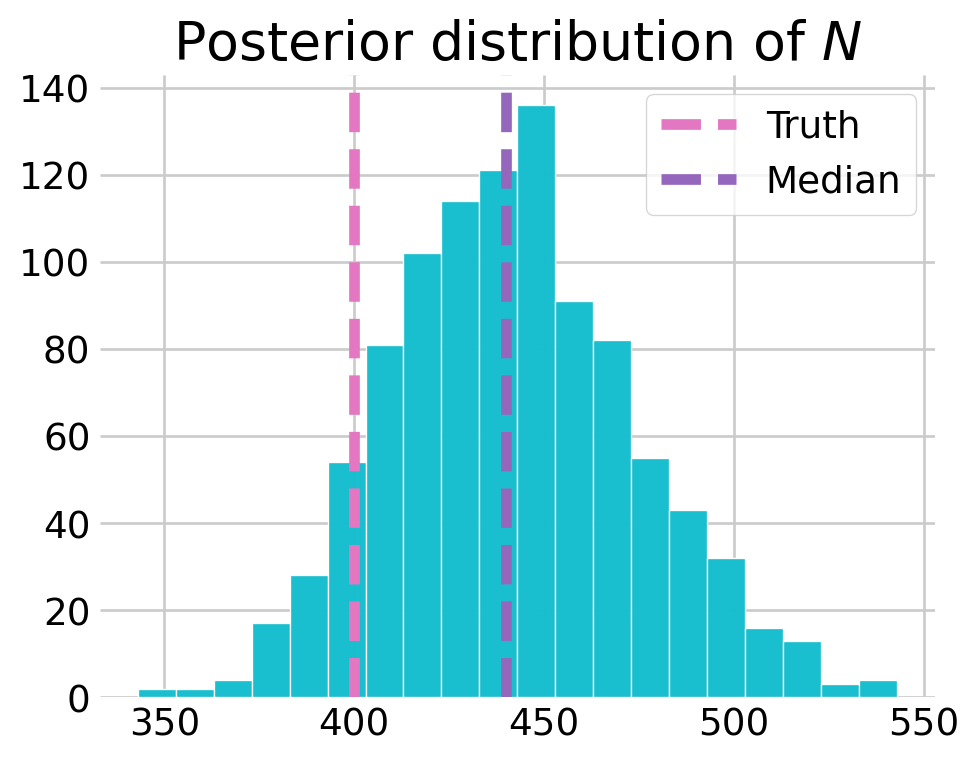

In [10]:
#| fig-cap: Posterior distribution of $N$ with priors on $\pi$ and $\psi$
#| label: fig-n-prior2

# generate the posterior predictive distribution for N
samples = mcmc.get_samples()
z = sample_z(js_prior2, samples, capture_histories)
ever_alive = z.max(axis=1) > 0
samples['N'] = ever_alive.sum(axis=1)

# create the plot
fig, ax = plt.subplots(figsize=(5, 4), sharey=True)

ax.hist(samples['N'], bins=20, fc='tab:cyan', ec='w', alpha=0.99)

ax.set_title(r'Posterior distribution of $N$')
ax.axvline(SUPERPOPULATION_SIZE, linestyle='--', color='tab:pink', label='Truth')
ax.axvline(np.median(samples['N']), linestyle='--', color='tab:purple', label='Median')

ax.legend()

plt.show()

In [11]:
def js_prior3(capture_history):

    super_size, occasion_count = capture_history.shape

    phi = numpyro.sample('phi', dist.Uniform(0, 1))
    p = numpyro.sample('p', dist.Uniform(0, 1))

    # approximate the situation where half of all individuals are allocated
    # to each time step
    S = 1.5
    t = np.arange(1, occasion_count + 1)
    C = occasion_count * 2
    a_t = S / (C - (t - 1))
    b_t = S - a_t
    with numpyro.plate('occasions', occasion_count):
        gamma = numpyro.sample('gamma', dist.Beta(a_t, b_t))

    def transition_and_capture(carry, y_current):

        z_previous, t = carry

        trans_probs = jnp.array([
            [1 - gamma[t], gamma[t], 0.0],  # From not yet entered
            [0.0, phi, 1 - phi],            # From alive
            [0.0, 0.0, 1.0]                 # From dead
        ])

        with numpyro.plate("animals", super_size, dim=-1):

            mu_z_current = trans_probs[z_previous]
            z_current = numpyro.sample(
                "state",
                dist.Categorical(dist.util.clamp_probs(mu_z_current)),
                infer={"enumerate": "parallel"}
            )

            mu_y_current = jnp.where(z_current == 1, p, 0.0)
            numpyro.sample(
                "obs",
                dist.Bernoulli(dist.util.clamp_probs(mu_y_current)),
                obs=y_current
            )

        return (z_current, t + 1), None

    # start everyone in the not yet entered state
    state_init = jnp.zeros(super_size, dtype=jnp.int32)
    scan(
        transition_and_capture,
        (state_init, 0),
         jnp.swapaxes(capture_history, 0, 1)
    )

In [12]:
# specify which sampler you want to use
nuts_kernel = NUTS(js_prior3)

# configure the MCMC run
mcmc = MCMC(nuts_kernel, num_warmup=WARMUP_COUNT, num_samples=SAMPLE_COUNT,
            num_chains=CHAIN_COUNT)

# run the MCMC then inspect the output
mcmc.run(rng_key, capture_histories)
mcmc.print_summary()

  0%|          | 0/1500 [00:00<?, ?it/s]

warmup:   0%|          | 1/1500 [00:01<30:17,  1.21s/it, 1 steps of size 2.34e+00. acc. prob=0.00]

warmup:   1%|          | 12/1500 [00:01<02:03, 12.08it/s, 31 steps of size 6.52e-02. acc. prob=0.67]

warmup:   1%|          | 18/1500 [00:01<01:28, 16.75it/s, 7 steps of size 1.28e-01. acc. prob=0.72] 

warmup:   2%|▏         | 25/1500 [00:01<01:00, 24.35it/s, 7 steps of size 1.24e-01. acc. prob=0.74]

warmup:   2%|▏         | 36/1500 [00:01<00:37, 38.54it/s, 31 steps of size 5.38e-02. acc. prob=0.74]

warmup:   3%|▎         | 44/1500 [00:01<00:33, 43.14it/s, 7 steps of size 1.19e-01. acc. prob=0.76] 

warmup:   3%|▎         | 51/1500 [00:01<00:29, 48.47it/s, 15 steps of size 1.56e-01. acc. prob=0.77]

warmup:   4%|▍         | 58/1500 [00:02<00:27, 52.55it/s, 15 steps of size 1.29e-01. acc. prob=0.77]

warmup:   5%|▍         | 71/1500 [00:02<00:20, 69.77it/s, 15 steps of size 9.04e-02. acc. prob=0.77]

warmup:   5%|▌         | 81/1500 [00:02<00:18, 77.35it/s, 15 steps of size 7.73e-02. acc. prob=0.77]

warmup:   6%|▌         | 92/1500 [00:02<00:16, 84.06it/s, 15 steps of size 7.44e-02. acc. prob=0.77]

warmup:   7%|▋         | 102/1500 [00:02<00:17, 80.10it/s, 1 steps of size 2.47e-01. acc. prob=0.77]

warmup:   7%|▋         | 111/1500 [00:02<00:17, 81.17it/s, 15 steps of size 9.98e-01. acc. prob=0.78]

warmup:   8%|▊         | 120/1500 [00:02<00:17, 80.40it/s, 3 steps of size 1.30e-01. acc. prob=0.77] 

warmup:   9%|▊         | 129/1500 [00:02<00:16, 82.79it/s, 31 steps of size 2.15e-01. acc. prob=0.78]

warmup:   9%|▉         | 141/1500 [00:02<00:14, 92.55it/s, 15 steps of size 5.43e-01. acc. prob=0.78]

warmup:  10%|█         | 154/1500 [00:03<00:13, 103.11it/s, 7 steps of size 6.66e-01. acc. prob=0.78]

warmup:  11%|█         | 165/1500 [00:03<00:14, 93.45it/s, 31 steps of size 2.50e-01. acc. prob=0.78]

warmup:  12%|█▏        | 177/1500 [00:03<00:13, 99.08it/s, 7 steps of size 6.18e-01. acc. prob=0.78] 

warmup:  13%|█▎        | 190/1500 [00:03<00:12, 106.17it/s, 7 steps of size 8.17e-01. acc. prob=0.78]

warmup:  13%|█▎        | 201/1500 [00:03<00:12, 104.52it/s, 15 steps of size 2.25e-01. acc. prob=0.78]

warmup:  14%|█▍        | 215/1500 [00:03<00:11, 113.01it/s, 15 steps of size 5.01e-01. acc. prob=0.78]

warmup:  15%|█▌        | 227/1500 [00:03<00:11, 110.33it/s, 7 steps of size 6.39e-01. acc. prob=0.78] 

warmup:  16%|█▌        | 239/1500 [00:03<00:12, 101.25it/s, 7 steps of size 5.32e-01. acc. prob=0.78]

warmup:  17%|█▋        | 250/1500 [00:03<00:12, 101.98it/s, 23 steps of size 2.69e-01. acc. prob=0.78]

warmup:  17%|█▋        | 261/1500 [00:04<00:22, 54.10it/s, 31 steps of size 2.47e-01. acc. prob=0.78] 

warmup:  18%|█▊        | 269/1500 [00:04<00:26, 46.30it/s, 127 steps of size 6.04e-02. acc. prob=0.78]

warmup:  18%|█▊        | 276/1500 [00:04<00:29, 42.06it/s, 12 steps of size 3.05e-02. acc. prob=0.78] 

warmup:  19%|█▉        | 282/1500 [00:05<00:34, 35.35it/s, 63 steps of size 1.42e-01. acc. prob=0.78]

warmup:  19%|█▉        | 287/1500 [00:05<00:37, 32.04it/s, 31 steps of size 2.01e-01. acc. prob=0.78]

warmup:  19%|█▉        | 291/1500 [00:05<00:41, 29.25it/s, 31 steps of size 1.65e-01. acc. prob=0.78]

warmup:  20%|█▉        | 295/1500 [00:05<00:44, 27.08it/s, 63 steps of size 9.53e-02. acc. prob=0.78]

warmup:  20%|██        | 300/1500 [00:05<00:41, 29.18it/s, 63 steps of size 1.48e-01. acc. prob=0.78]

warmup:  20%|██        | 305/1500 [00:06<00:37, 32.07it/s, 31 steps of size 2.37e-01. acc. prob=0.78]

warmup:  21%|██        | 311/1500 [00:06<00:32, 36.88it/s, 15 steps of size 6.36e-02. acc. prob=0.78]

warmup:  21%|██        | 316/1500 [00:06<00:33, 35.13it/s, 63 steps of size 1.14e-01. acc. prob=0.78]

warmup:  21%|██▏       | 321/1500 [00:06<00:33, 34.93it/s, 63 steps of size 6.01e-02. acc. prob=0.78]

warmup:  22%|██▏       | 325/1500 [00:06<00:35, 32.89it/s, 15 steps of size 1.51e-01. acc. prob=0.78]

warmup:  22%|██▏       | 329/1500 [00:06<00:35, 33.18it/s, 15 steps of size 1.97e-01. acc. prob=0.78]

warmup:  22%|██▏       | 333/1500 [00:06<00:34, 33.46it/s, 31 steps of size 1.38e-01. acc. prob=0.78]

warmup:  22%|██▏       | 337/1500 [00:06<00:35, 33.00it/s, 31 steps of size 1.09e-01. acc. prob=0.78]

warmup:  23%|██▎       | 342/1500 [00:07<00:31, 36.56it/s, 28 steps of size 1.14e-01. acc. prob=0.78]

warmup:  23%|██▎       | 348/1500 [00:07<00:30, 37.73it/s, 63 steps of size 1.00e-01. acc. prob=0.78]

warmup:  24%|██▎       | 353/1500 [00:07<00:30, 37.35it/s, 63 steps of size 7.41e-02. acc. prob=0.78]

warmup:  24%|██▍       | 357/1500 [00:07<00:42, 26.85it/s, 63 steps of size 8.28e-02. acc. prob=0.78]

warmup:  24%|██▍       | 362/1500 [00:07<00:43, 26.23it/s, 127 steps of size 7.06e-02. acc. prob=0.78]

warmup:  24%|██▍       | 366/1500 [00:07<00:39, 28.65it/s, 15 steps of size 1.71e-01. acc. prob=0.78] 

warmup:  25%|██▍       | 370/1500 [00:08<00:37, 29.83it/s, 63 steps of size 1.22e-01. acc. prob=0.78]

warmup:  25%|██▌       | 376/1500 [00:08<00:31, 35.40it/s, 31 steps of size 1.39e-01. acc. prob=0.78]

warmup:  25%|██▌       | 381/1500 [00:08<00:29, 37.45it/s, 31 steps of size 1.15e-01. acc. prob=0.78]

warmup:  26%|██▌       | 386/1500 [00:08<00:28, 38.86it/s, 31 steps of size 1.21e-01. acc. prob=0.78]

warmup:  26%|██▌       | 391/1500 [00:08<00:27, 40.33it/s, 31 steps of size 1.08e-01. acc. prob=0.78]

warmup:  26%|██▋       | 396/1500 [00:08<00:26, 41.08it/s, 15 steps of size 2.68e-01. acc. prob=0.79]

warmup:  27%|██▋       | 402/1500 [00:08<00:24, 43.92it/s, 31 steps of size 1.29e-01. acc. prob=0.78]

warmup:  27%|██▋       | 407/1500 [00:08<00:25, 42.20it/s, 31 steps of size 9.91e-02. acc. prob=0.78]

warmup:  27%|██▋       | 412/1500 [00:08<00:25, 42.85it/s, 15 steps of size 1.81e-01. acc. prob=0.79]

warmup:  28%|██▊       | 417/1500 [00:09<00:25, 42.47it/s, 31 steps of size 1.45e-01. acc. prob=0.78]

warmup:  28%|██▊       | 422/1500 [00:09<00:28, 37.63it/s, 31 steps of size 1.71e-01. acc. prob=0.79]

warmup:  29%|██▊       | 428/1500 [00:09<00:25, 42.11it/s, 15 steps of size 1.47e-01. acc. prob=0.79]

warmup:  29%|██▉       | 433/1500 [00:09<00:25, 42.67it/s, 31 steps of size 2.28e-01. acc. prob=0.79]

warmup:  29%|██▉       | 438/1500 [00:09<00:27, 38.29it/s, 31 steps of size 1.22e-01. acc. prob=0.79]

warmup:  29%|██▉       | 442/1500 [00:09<00:30, 35.23it/s, 63 steps of size 1.00e-01. acc. prob=0.78]

warmup:  30%|██▉       | 447/1500 [00:09<00:28, 36.59it/s, 31 steps of size 1.29e-01. acc. prob=0.79]

warmup:  30%|███       | 451/1500 [00:10<00:30, 34.86it/s, 31 steps of size 2.14e+00. acc. prob=0.79]

warmup:  31%|███       | 466/1500 [00:10<00:17, 59.40it/s, 31 steps of size 2.16e-01. acc. prob=0.78]

warmup:  32%|███▏      | 477/1500 [00:10<00:14, 69.21it/s, 31 steps of size 1.70e-01. acc. prob=0.78]

warmup:  32%|███▏      | 486/1500 [00:10<00:13, 74.33it/s, 15 steps of size 5.27e-01. acc. prob=0.79]

warmup:  33%|███▎      | 496/1500 [00:10<00:12, 80.47it/s, 15 steps of size 3.20e-01. acc. prob=0.79]

sample:  34%|███▍      | 509/1500 [00:10<00:10, 92.55it/s, 15 steps of size 3.82e-01. acc. prob=0.94]

sample:  35%|███▍      | 522/1500 [00:10<00:09, 99.63it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  36%|███▌      | 535/1500 [00:10<00:08, 107.92it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  36%|███▋      | 546/1500 [00:10<00:09, 99.23it/s, 31 steps of size 3.82e-01. acc. prob=0.93] 

sample:  37%|███▋      | 557/1500 [00:11<00:09, 96.54it/s, 7 steps of size 3.82e-01. acc. prob=0.93] 

sample:  38%|███▊      | 569/1500 [00:11<00:09, 100.18it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  39%|███▊      | 580/1500 [00:11<00:10, 89.76it/s, 15 steps of size 3.82e-01. acc. prob=0.93] 

sample:  39%|███▉      | 590/1500 [00:11<00:10, 86.35it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  40%|████      | 600/1500 [00:11<00:10, 89.72it/s, 7 steps of size 3.82e-01. acc. prob=0.93] 

sample:  41%|████      | 612/1500 [00:11<00:09, 94.78it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  42%|████▏     | 624/1500 [00:11<00:08, 99.99it/s, 7 steps of size 3.82e-01. acc. prob=0.93] 

sample:  42%|████▏     | 636/1500 [00:11<00:08, 102.13it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  43%|████▎     | 647/1500 [00:11<00:08, 103.29it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  44%|████▍     | 658/1500 [00:12<00:08, 101.54it/s, 7 steps of size 3.82e-01. acc. prob=0.93] 

sample:  45%|████▍     | 670/1500 [00:12<00:07, 105.12it/s, 7 steps of size 3.82e-01. acc. prob=0.93]

sample:  45%|████▌     | 681/1500 [00:12<00:08, 95.89it/s, 23 steps of size 3.82e-01. acc. prob=0.93]

sample:  46%|████▌     | 691/1500 [00:12<00:09, 86.22it/s, 31 steps of size 3.82e-01. acc. prob=0.93]

sample:  47%|████▋     | 701/1500 [00:12<00:08, 89.70it/s, 7 steps of size 3.82e-01. acc. prob=0.93] 

sample:  47%|████▋     | 711/1500 [00:12<00:08, 90.18it/s, 7 steps of size 3.82e-01. acc. prob=0.93]

sample:  48%|████▊     | 722/1500 [00:12<00:08, 94.01it/s, 7 steps of size 3.82e-01. acc. prob=0.93]

sample:  49%|████▉     | 732/1500 [00:12<00:08, 95.65it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  50%|████▉     | 743/1500 [00:12<00:07, 98.03it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  50%|█████     | 755/1500 [00:13<00:07, 103.61it/s, 7 steps of size 3.82e-01. acc. prob=0.93]

sample:  51%|█████     | 768/1500 [00:13<00:06, 109.61it/s, 7 steps of size 3.82e-01. acc. prob=0.93]

sample:  52%|█████▏    | 780/1500 [00:13<00:06, 110.51it/s, 7 steps of size 3.82e-01. acc. prob=0.93]

sample:  53%|█████▎    | 794/1500 [00:13<00:06, 117.59it/s, 7 steps of size 3.82e-01. acc. prob=0.93]

sample:  54%|█████▎    | 806/1500 [00:13<00:06, 112.28it/s, 7 steps of size 3.82e-01. acc. prob=0.94]

sample:  55%|█████▍    | 818/1500 [00:13<00:06, 112.72it/s, 7 steps of size 3.82e-01. acc. prob=0.94]

sample:  55%|█████▌    | 830/1500 [00:13<00:06, 107.17it/s, 7 steps of size 3.82e-01. acc. prob=0.94]

sample:  56%|█████▌    | 842/1500 [00:13<00:06, 109.13it/s, 7 steps of size 3.82e-01. acc. prob=0.94]

sample:  57%|█████▋    | 853/1500 [00:13<00:06, 105.66it/s, 7 steps of size 3.82e-01. acc. prob=0.94]

sample:  58%|█████▊    | 865/1500 [00:14<00:05, 108.12it/s, 15 steps of size 3.82e-01. acc. prob=0.94]

sample:  58%|█████▊    | 876/1500 [00:14<00:06, 103.08it/s, 15 steps of size 3.82e-01. acc. prob=0.94]

sample:  59%|█████▉    | 887/1500 [00:14<00:05, 103.30it/s, 7 steps of size 3.82e-01. acc. prob=0.94] 

sample:  60%|██████    | 900/1500 [00:14<00:05, 109.27it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  61%|██████    | 912/1500 [00:14<00:05, 108.71it/s, 15 steps of size 3.82e-01. acc. prob=0.94]

sample:  62%|██████▏   | 923/1500 [00:14<00:05, 104.88it/s, 15 steps of size 3.82e-01. acc. prob=0.94]

sample:  62%|██████▏   | 934/1500 [00:14<00:05, 104.59it/s, 15 steps of size 3.82e-01. acc. prob=0.94]

sample:  63%|██████▎   | 945/1500 [00:14<00:05, 104.20it/s, 7 steps of size 3.82e-01. acc. prob=0.94] 

sample:  64%|██████▍   | 957/1500 [00:14<00:05, 106.94it/s, 15 steps of size 3.82e-01. acc. prob=0.94]

sample:  65%|██████▍   | 968/1500 [00:15<00:05, 99.28it/s, 15 steps of size 3.82e-01. acc. prob=0.94] 

sample:  65%|██████▌   | 980/1500 [00:15<00:05, 102.39it/s, 11 steps of size 3.82e-01. acc. prob=0.94]

sample:  66%|██████▌   | 993/1500 [00:15<00:04, 108.56it/s, 7 steps of size 3.82e-01. acc. prob=0.94] 

sample:  67%|██████▋   | 1005/1500 [00:15<00:04, 110.20it/s, 15 steps of size 3.82e-01. acc. prob=0.94]

sample:  68%|██████▊   | 1017/1500 [00:15<00:04, 111.38it/s, 15 steps of size 3.82e-01. acc. prob=0.94]

sample:  69%|██████▊   | 1029/1500 [00:15<00:04, 112.19it/s, 7 steps of size 3.82e-01. acc. prob=0.94] 

sample:  69%|██████▉   | 1041/1500 [00:15<00:04, 110.69it/s, 15 steps of size 3.82e-01. acc. prob=0.94]

sample:  70%|███████   | 1054/1500 [00:15<00:03, 112.59it/s, 15 steps of size 3.82e-01. acc. prob=0.94]

sample:  71%|███████   | 1067/1500 [00:15<00:03, 116.04it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  72%|███████▏  | 1079/1500 [00:16<00:03, 109.21it/s, 15 steps of size 3.82e-01. acc. prob=0.94]

sample:  73%|███████▎  | 1091/1500 [00:16<00:03, 104.83it/s, 7 steps of size 3.82e-01. acc. prob=0.94] 

sample:  74%|███████▎  | 1104/1500 [00:16<00:03, 104.74it/s, 31 steps of size 3.82e-01. acc. prob=0.93]

sample:  74%|███████▍  | 1115/1500 [00:16<00:03, 104.48it/s, 7 steps of size 3.82e-01. acc. prob=0.93] 

sample:  75%|███████▌  | 1129/1500 [00:16<00:03, 112.83it/s, 7 steps of size 3.82e-01. acc. prob=0.94]

sample:  76%|███████▌  | 1141/1500 [00:16<00:03, 111.15it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  77%|███████▋  | 1153/1500 [00:16<00:03, 108.11it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  78%|███████▊  | 1167/1500 [00:16<00:02, 113.59it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  79%|███████▊  | 1180/1500 [00:16<00:02, 114.65it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  79%|███████▉  | 1192/1500 [00:17<00:02, 110.56it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  80%|████████  | 1206/1500 [00:17<00:02, 115.35it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  81%|████████  | 1218/1500 [00:17<00:02, 105.38it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  82%|████████▏ | 1232/1500 [00:17<00:02, 113.16it/s, 7 steps of size 3.82e-01. acc. prob=0.93] 

sample:  83%|████████▎ | 1244/1500 [00:17<00:02, 109.01it/s, 7 steps of size 3.82e-01. acc. prob=0.93]

sample:  84%|████████▎ | 1256/1500 [00:17<00:02, 99.84it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  85%|████████▍ | 1269/1500 [00:17<00:02, 102.49it/s, 23 steps of size 3.82e-01. acc. prob=0.93]

sample:  85%|████████▌ | 1282/1500 [00:17<00:02, 106.31it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  86%|████████▌ | 1293/1500 [00:18<00:02, 87.88it/s, 7 steps of size 3.82e-01. acc. prob=0.93]  

sample:  87%|████████▋ | 1305/1500 [00:18<00:02, 94.19it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  88%|████████▊ | 1315/1500 [00:18<00:02, 90.50it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  88%|████████▊ | 1325/1500 [00:18<00:01, 90.60it/s, 7 steps of size 3.82e-01. acc. prob=0.93] 

sample:  89%|████████▉ | 1335/1500 [00:18<00:01, 92.43it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  90%|████████▉ | 1347/1500 [00:18<00:01, 98.15it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  91%|█████████ | 1359/1500 [00:18<00:01, 100.72it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  91%|█████████▏| 1370/1500 [00:18<00:01, 98.18it/s, 15 steps of size 3.82e-01. acc. prob=0.93] 

sample:  92%|█████████▏| 1382/1500 [00:19<00:01, 102.43it/s, 7 steps of size 3.82e-01. acc. prob=0.93]

sample:  93%|█████████▎| 1395/1500 [00:19<00:00, 108.42it/s, 15 steps of size 3.82e-01. acc. prob=0.93]

sample:  94%|█████████▎| 1406/1500 [00:19<00:00, 106.09it/s, 7 steps of size 3.82e-01. acc. prob=0.93] 

sample:  95%|█████████▍| 1419/1500 [00:19<00:00, 111.34it/s, 7 steps of size 3.82e-01. acc. prob=0.93]

sample:  95%|█████████▌| 1431/1500 [00:19<00:00, 112.05it/s, 7 steps of size 3.82e-01. acc. prob=0.93]

sample:  96%|█████████▌| 1443/1500 [00:19<00:00, 102.65it/s, 7 steps of size 3.82e-01. acc. prob=0.93]

sample:  97%|█████████▋| 1454/1500 [00:19<00:00, 102.86it/s, 7 steps of size 3.82e-01. acc. prob=0.93]

sample:  98%|█████████▊| 1465/1500 [00:19<00:00, 101.31it/s, 15 steps of size 3.82e-01. acc. prob=0.94]

sample:  98%|█████████▊| 1477/1500 [00:19<00:00, 104.78it/s, 7 steps of size 3.82e-01. acc. prob=0.94] 

sample:  99%|█████████▉| 1491/1500 [00:20<00:00, 112.80it/s, 7 steps of size 3.82e-01. acc. prob=0.94]

sample: 100%|██████████| 1500/1500 [00:20<00:00, 74.69it/s, 15 steps of size 3.82e-01. acc. prob=0.93]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
  gamma[0]      0.14      0.02      0.14      0.11      0.17    461.18      1.00
  gamma[1]      0.08      0.02      0.08      0.04      0.11    538.98      1.00
  gamma[2]      0.06      0.02      0.06      0.04      0.09    681.52      1.00
  gamma[3]      0.06      0.02      0.06      0.03      0.08    588.55      1.00
  gamma[4]      0.06      0.02      0.06      0.03      0.09    430.03      1.00
  gamma[5]      0.06      0.02      0.06      0.03      0.09    290.09      1.01
  gamma[6]      0.04      0.02      0.04      0.00      0.07    200.78      1.02
         p      0.49      0.04      0.49      0.44      0.56    412.63      1.01
       phi      0.69      0.03      0.69      0.64      0.73    576.80      1.01

Number of divergences: 2


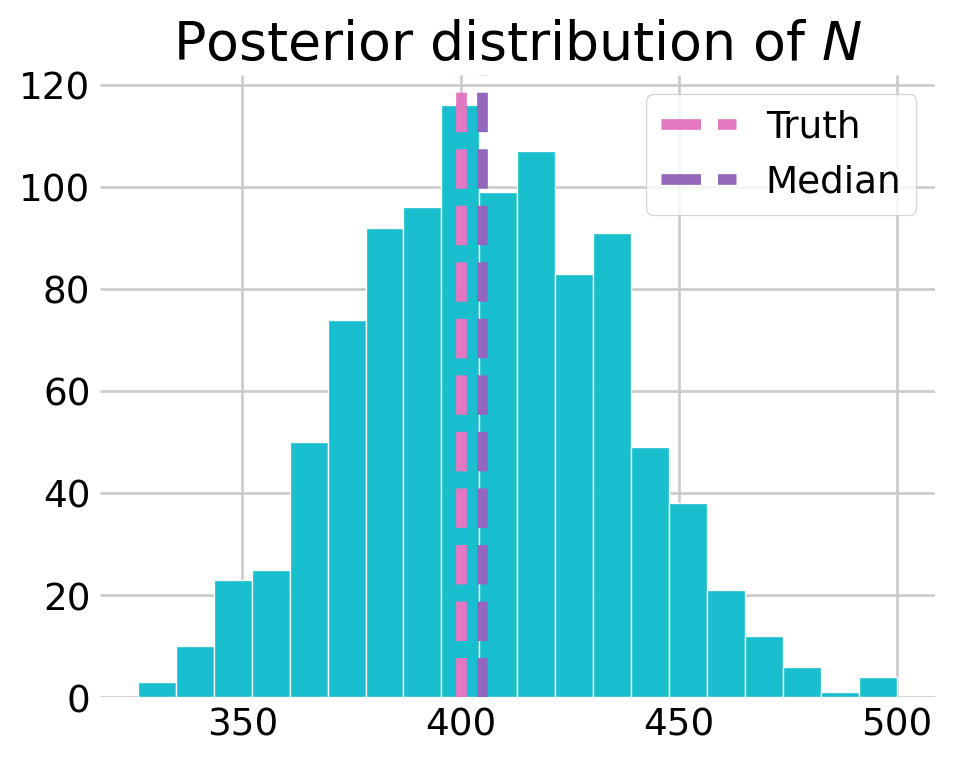

In [13]:
#| fig-cap: Posterior distribution of $N$ with approximate prior on $\gamma$
#| label: fig-n-prior3

# generate the posterior predictive distribution for N
samples = mcmc.get_samples()
z = sample_z(js_prior3, samples, capture_histories)
ever_alive = z.max(axis=1) > 0
samples['N'] = ever_alive.sum(axis=1)

# create the plot
fig, ax = plt.subplots(figsize=(5, 4), sharey=True)

ax.hist(samples['N'], bins=20, fc='tab:cyan', ec='w', alpha=0.99)

ax.set_title(r'Posterior distribution of $N$')
ax.axvline(SUPERPOPULATION_SIZE, linestyle='--', color='tab:pink', label='Truth')
ax.axvline(np.median(samples['N']), linestyle='--', color='tab:purple', label='Median')

ax.legend()

plt.show()

In [14]:
def js_full(capture_history):

    super_size, occasion_count = capture_history.shape
    interval_count = occasion_count - 1
    p_count = interval_count - 1

    # parameterize the  entry probabilities in terms of pi and psi
    psi = numpyro.sample('psi', dist.Uniform(0, 1))
    pi = numpyro.sample('pi', dist.Dirichlet(jnp.ones(occasion_count)))

    # initial occasion: gamma_0 = psi * pi_0
    # otherwise       : gamma_t = psi * pi_t / (1 - sum(pi_[t - 1]))
    denominators = jnp.concatenate([
        jnp.array([1.0]),          # for t=0, just psi * pi_0
        1.0 - jnp.cumsum(pi)[:-1]
    ])
    gamma = numpyro.deterministic('gamma', psi * pi / denominators)

    with numpyro.plate('intervals', interval_count):
        phi = numpyro.sample('phi', dist.Uniform(0, 1))

    with numpyro.plate('ps', p_count):
        p_estimable = numpyro.sample('p_estimable', dist.Uniform(0, 1))

    p = jnp.concatenate([jnp.array([1]), p_estimable, jnp.array([1])])

    def transition_and_capture(carry, y_current):

        z_previous, t = carry

        trans_probs = jnp.array([
            [1 - gamma[t], gamma[t], 0.0],         # From not yet entered
            [0.0, phi[t - 1], 1 - phi[t - 1]],     # From alive
            [0.0, 0.0, 1.0]                        # From dead
        ])

        with numpyro.plate("animals", super_size, dim=-1):

            mu_z_current = trans_probs[z_previous]
            z_current = numpyro.sample(
                "state",
                dist.Categorical(dist.util.clamp_probs(mu_z_current)),
                infer={"enumerate": "parallel"}
            )

            mu_y_current = jnp.where(z_current == 1, p[t], 0.0)
            numpyro.sample(
                "obs",
                dist.Bernoulli(dist.util.clamp_probs(mu_y_current)),
                obs=y_current
            )

        return (z_current, t + 1), None

    state_init = jnp.zeros(super_size, dtype=jnp.int32)
    scan(transition_and_capture, (state_init, 0),
         jnp.swapaxes(capture_history, 0, 1))

In [15]:
dipper = load_dipper_data()

# specify which sampler you want to use
nuts_kernel = NUTS(js_full)

# configure the MCMC run
mcmc = MCMC(nuts_kernel, num_warmup=WARMUP_COUNT, num_samples=SAMPLE_COUNT,
            num_chains=CHAIN_COUNT)

# run the MCMC then inspect the output
mcmc.run(rng_key, dipper)
mcmc.print_summary()

  0%|          | 0/1500 [00:00<?, ?it/s]

warmup:   0%|          | 1/1500 [00:01<37:01,  1.48s/it, 1 steps of size 2.34e+00. acc. prob=0.00]

warmup:   1%|          | 12/1500 [00:01<02:27, 10.06it/s, 127 steps of size 3.37e-02. acc. prob=0.65]

warmup:   1%|▏         | 20/1500 [00:01<01:25, 17.23it/s, 63 steps of size 3.40e-02. acc. prob=0.70] 

warmup:   2%|▏         | 29/1500 [00:01<00:55, 26.44it/s, 31 steps of size 1.45e-01. acc. prob=0.75]

warmup:   2%|▏         | 36/1500 [00:02<00:47, 30.57it/s, 15 steps of size 2.58e-02. acc. prob=0.74]

warmup:   3%|▎         | 42/1500 [00:02<00:42, 33.96it/s, 15 steps of size 1.22e-01. acc. prob=0.76]

warmup:   3%|▎         | 49/1500 [00:02<00:35, 40.41it/s, 15 steps of size 8.02e-02. acc. prob=0.76]

warmup:   4%|▍         | 57/1500 [00:02<00:31, 46.36it/s, 127 steps of size 4.94e-02. acc. prob=0.76]

warmup:   4%|▍         | 67/1500 [00:02<00:24, 58.12it/s, 7 steps of size 1.84e-01. acc. prob=0.77]  

warmup:   5%|▌         | 75/1500 [00:02<00:24, 59.35it/s, 31 steps of size 8.55e-02. acc. prob=0.77]

warmup:   6%|▌         | 84/1500 [00:02<00:23, 61.14it/s, 95 steps of size 7.82e-02. acc. prob=0.77]

warmup:   6%|▌         | 93/1500 [00:02<00:20, 67.99it/s, 31 steps of size 1.39e-01. acc. prob=0.78]

warmup:   7%|▋         | 101/1500 [00:02<00:21, 66.21it/s, 63 steps of size 9.35e-01. acc. prob=0.77]

warmup:   8%|▊         | 115/1500 [00:03<00:16, 84.05it/s, 15 steps of size 5.83e-01. acc. prob=0.78]

warmup:   9%|▉         | 132/1500 [00:03<00:12, 105.51it/s, 15 steps of size 6.51e-01. acc. prob=0.78]

warmup:  10%|▉         | 144/1500 [00:03<00:12, 104.54it/s, 63 steps of size 1.81e-01. acc. prob=0.78]

warmup:  11%|█         | 160/1500 [00:03<00:11, 116.00it/s, 31 steps of size 2.16e-01. acc. prob=0.78]

warmup:  11%|█▏        | 172/1500 [00:03<00:11, 116.94it/s, 31 steps of size 2.35e-01. acc. prob=0.78]

warmup:  13%|█▎        | 189/1500 [00:03<00:09, 131.19it/s, 31 steps of size 1.75e-01. acc. prob=0.78]

warmup:  14%|█▎        | 203/1500 [00:03<00:10, 127.54it/s, 15 steps of size 2.94e-01. acc. prob=0.78]

warmup:  15%|█▍        | 222/1500 [00:03<00:08, 143.84it/s, 7 steps of size 7.56e-01. acc. prob=0.78] 

warmup:  16%|█▌        | 240/1500 [00:03<00:08, 150.52it/s, 31 steps of size 2.70e-01. acc. prob=0.78]

warmup:  17%|█▋        | 259/1500 [00:04<00:08, 152.24it/s, 63 steps of size 1.19e-01. acc. prob=0.78]

warmup:  19%|█▊        | 279/1500 [00:04<00:07, 162.75it/s, 15 steps of size 5.39e-01. acc. prob=0.78]

warmup:  20%|██        | 302/1500 [00:04<00:06, 175.36it/s, 31 steps of size 2.43e-01. acc. prob=0.78]

warmup:  22%|██▏       | 323/1500 [00:04<00:06, 180.84it/s, 31 steps of size 2.50e-01. acc. prob=0.78]

warmup:  23%|██▎       | 348/1500 [00:04<00:05, 198.85it/s, 7 steps of size 5.09e-01. acc. prob=0.78] 

warmup:  25%|██▍       | 373/1500 [00:04<00:05, 212.04it/s, 7 steps of size 4.29e-01. acc. prob=0.79]

warmup:  26%|██▋       | 397/1500 [00:04<00:05, 216.53it/s, 15 steps of size 4.50e-01. acc. prob=0.79]

warmup:  28%|██▊       | 419/1500 [00:04<00:05, 210.98it/s, 15 steps of size 4.84e-01. acc. prob=0.79]

warmup:  29%|██▉       | 441/1500 [00:04<00:05, 209.75it/s, 15 steps of size 5.27e-01. acc. prob=0.79]

warmup:  31%|███       | 465/1500 [00:05<00:04, 215.73it/s, 15 steps of size 3.92e-01. acc. prob=0.79]

warmup:  32%|███▏      | 487/1500 [00:05<00:05, 190.09it/s, 31 steps of size 1.61e-01. acc. prob=0.79]

sample:  34%|███▍      | 507/1500 [00:05<00:05, 183.19it/s, 15 steps of size 3.90e-01. acc. prob=0.90]

sample:  35%|███▌      | 526/1500 [00:05<00:05, 181.76it/s, 15 steps of size 3.90e-01. acc. prob=0.85]

sample:  36%|███▋      | 547/1500 [00:05<00:05, 187.94it/s, 15 steps of size 3.90e-01. acc. prob=0.87]

sample:  38%|███▊      | 567/1500 [00:05<00:05, 184.79it/s, 7 steps of size 3.90e-01. acc. prob=0.87] 

sample:  39%|███▉      | 586/1500 [00:05<00:05, 176.60it/s, 7 steps of size 3.90e-01. acc. prob=0.88]

sample:  40%|████      | 607/1500 [00:05<00:04, 184.69it/s, 15 steps of size 3.90e-01. acc. prob=0.87]

sample:  42%|████▏     | 628/1500 [00:05<00:04, 190.14it/s, 15 steps of size 3.90e-01. acc. prob=0.88]

sample:  43%|████▎     | 648/1500 [00:06<00:04, 189.83it/s, 15 steps of size 3.90e-01. acc. prob=0.88]

sample:  45%|████▍     | 668/1500 [00:06<00:04, 185.91it/s, 15 steps of size 3.90e-01. acc. prob=0.88]

sample:  46%|████▌     | 688/1500 [00:06<00:04, 186.76it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  47%|████▋     | 710/1500 [00:06<00:04, 194.86it/s, 7 steps of size 3.90e-01. acc. prob=0.89] 

sample:  49%|████▉     | 732/1500 [00:06<00:03, 200.50it/s, 7 steps of size 3.90e-01. acc. prob=0.89]

sample:  50%|█████     | 753/1500 [00:06<00:03, 194.25it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  52%|█████▏    | 773/1500 [00:06<00:03, 189.17it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  53%|█████▎    | 792/1500 [00:06<00:03, 184.65it/s, 7 steps of size 3.90e-01. acc. prob=0.89] 

sample:  54%|█████▍    | 812/1500 [00:06<00:03, 185.74it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  56%|█████▌    | 833/1500 [00:06<00:03, 189.25it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  57%|█████▋    | 852/1500 [00:07<00:03, 186.26it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  58%|█████▊    | 871/1500 [00:07<00:03, 180.72it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  59%|█████▉    | 890/1500 [00:07<00:03, 178.65it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  61%|██████    | 908/1500 [00:07<00:03, 174.02it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  62%|██████▏   | 926/1500 [00:07<00:03, 172.43it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  63%|██████▎   | 944/1500 [00:07<00:03, 173.09it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  64%|██████▍   | 963/1500 [00:07<00:03, 176.63it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  65%|██████▌   | 981/1500 [00:07<00:03, 172.81it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  67%|██████▋   | 1000/1500 [00:07<00:02, 176.13it/s, 7 steps of size 3.90e-01. acc. prob=0.89]

sample:  68%|██████▊   | 1019/1500 [00:08<00:02, 178.48it/s, 7 steps of size 3.90e-01. acc. prob=0.89]

sample:  69%|██████▉   | 1039/1500 [00:08<00:02, 183.49it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  71%|███████   | 1058/1500 [00:08<00:02, 182.03it/s, 7 steps of size 3.90e-01. acc. prob=0.89] 

sample:  72%|███████▏  | 1078/1500 [00:08<00:02, 185.52it/s, 7 steps of size 3.90e-01. acc. prob=0.89]

sample:  73%|███████▎  | 1100/1500 [00:08<00:02, 194.01it/s, 7 steps of size 3.90e-01. acc. prob=0.89]

sample:  75%|███████▍  | 1120/1500 [00:08<00:02, 185.31it/s, 7 steps of size 3.90e-01. acc. prob=0.89]

sample:  76%|███████▌  | 1141/1500 [00:08<00:01, 187.47it/s, 31 steps of size 3.90e-01. acc. prob=0.89]

sample:  77%|███████▋  | 1160/1500 [00:08<00:01, 181.78it/s, 7 steps of size 3.90e-01. acc. prob=0.89] 

sample:  79%|███████▉  | 1182/1500 [00:08<00:01, 190.95it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  80%|████████  | 1206/1500 [00:09<00:01, 203.87it/s, 7 steps of size 3.90e-01. acc. prob=0.89] 

sample:  82%|████████▏ | 1227/1500 [00:09<00:01, 200.56it/s, 7 steps of size 3.90e-01. acc. prob=0.89]

sample:  83%|████████▎ | 1248/1500 [00:09<00:01, 198.42it/s, 7 steps of size 3.90e-01. acc. prob=0.89]

sample:  85%|████████▍ | 1271/1500 [00:09<00:01, 206.24it/s, 7 steps of size 3.90e-01. acc. prob=0.89]

sample:  86%|████████▌ | 1292/1500 [00:09<00:01, 203.39it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  88%|████████▊ | 1313/1500 [00:09<00:00, 198.11it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  89%|████████▉ | 1335/1500 [00:09<00:00, 203.21it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  90%|█████████ | 1356/1500 [00:09<00:00, 201.62it/s, 7 steps of size 3.90e-01. acc. prob=0.89] 

sample:  92%|█████████▏| 1377/1500 [00:09<00:00, 198.40it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  93%|█████████▎| 1397/1500 [00:09<00:00, 190.22it/s, 7 steps of size 3.90e-01. acc. prob=0.89] 

sample:  94%|█████████▍| 1417/1500 [00:10<00:00, 191.52it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  96%|█████████▌| 1437/1500 [00:10<00:00, 189.01it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample:  97%|█████████▋| 1456/1500 [00:10<00:00, 187.85it/s, 7 steps of size 3.90e-01. acc. prob=0.89] 

sample:  98%|█████████▊| 1475/1500 [00:10<00:00, 186.71it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample: 100%|█████████▉| 1494/1500 [00:10<00:00, 184.48it/s, 15 steps of size 3.90e-01. acc. prob=0.89]

sample: 100%|██████████| 1500/1500 [00:10<00:00, 142.05it/s, 15 steps of size 3.90e-01. acc. prob=0.89]


                    mean       std    median      5.0%     95.0%     n_eff     r_hat
p_estimable[0]      0.72      0.11      0.73      0.55      0.90    620.34      1.00
p_estimable[1]      0.87      0.08      0.89      0.75      0.99    734.88      1.00
p_estimable[2]      0.88      0.06      0.89      0.79      0.98    905.07      1.00
p_estimable[3]      0.87      0.06      0.88      0.78      0.96    989.38      1.00
p_estimable[4]      0.92      0.04      0.92      0.85      0.98    883.81      1.00
        phi[0]      0.70      0.13      0.70      0.48      0.92    670.80      1.00
        phi[1]      0.46      0.07      0.46      0.35      0.58   1040.76      1.00
        phi[2]      0.48      0.06      0.48      0.38      0.58   1075.77      1.00
        phi[3]      0.63      0.06      0.63      0.53      0.72   1196.31      1.00
        phi[4]      0.60      0.06      0.60      0.51      0.69   1225.51      1.00
        phi[5]      0.52      0.05      0.53      0.45      0.61

In [16]:
# generate the posterior predictive distribution for N
samples = mcmc.get_samples()
z = sample_z(js_full, samples, dipper)
ever_alive = z.max(axis=1) > 0
samples['N'] = ever_alive.sum(axis=1)
samples['N'].mean()

Array(320.864, dtype=float32)

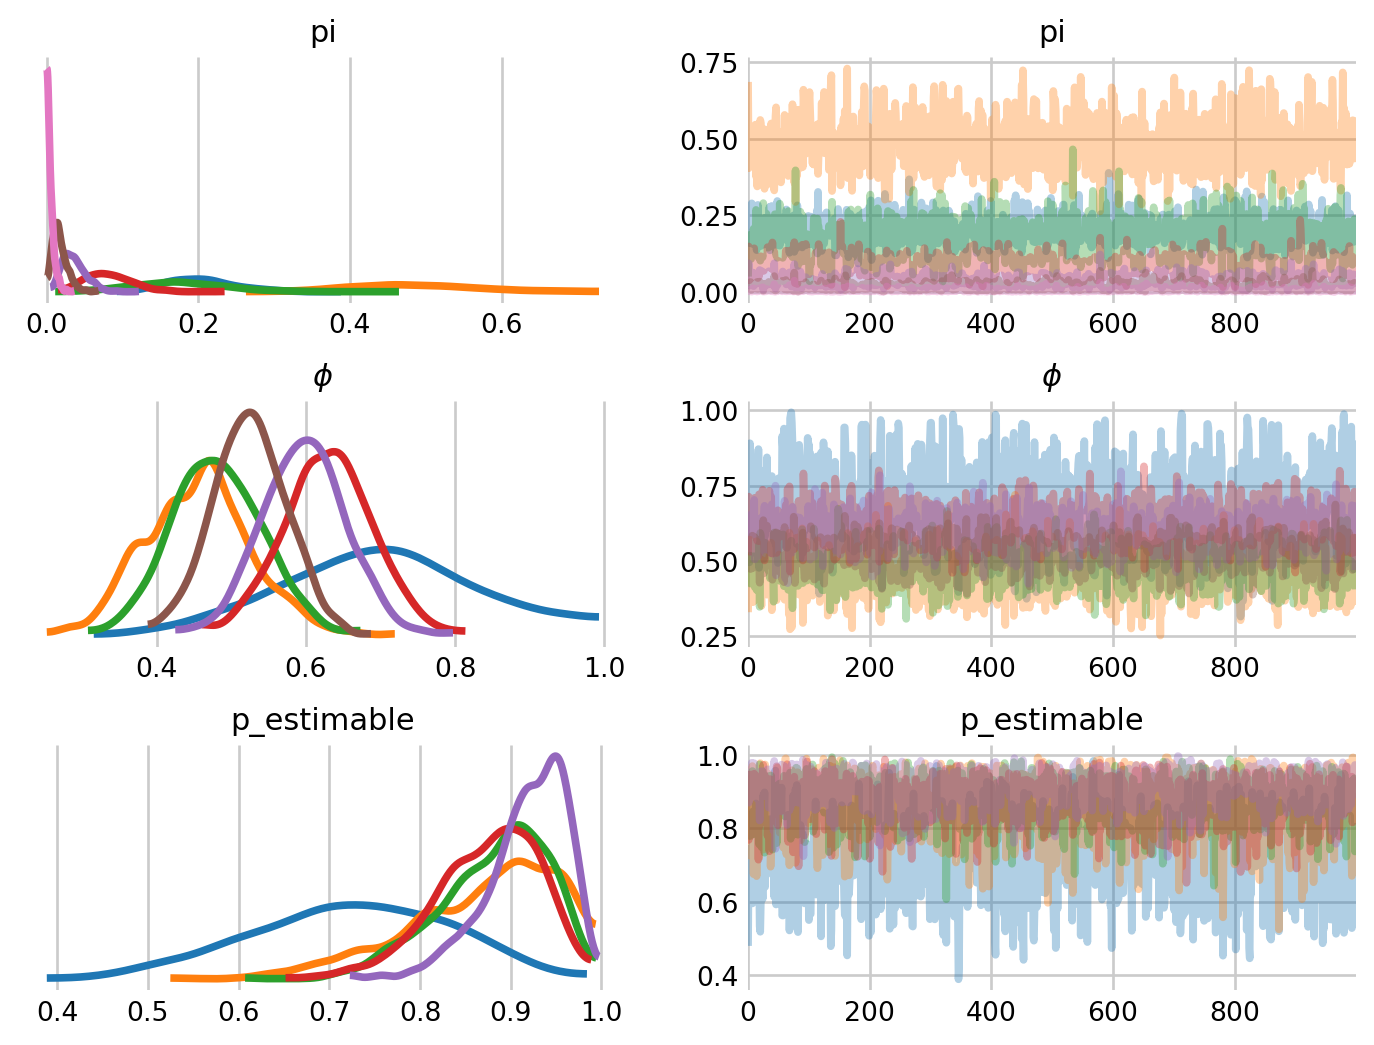

In [17]:
#| fig-cap: Traceplots for full model of the dipper data.
#| label: fig-trace-full

samples = mcmc.get_samples(group_by_chain=True)
idata = az.from_dict(samples)

# skip the first alpha_t because it is uninformative
az.plot_trace(idata, figsize=(8,6), var_names=['pi', 'phi', 'p_estimable'],
              labeller=labeller)
plt.subplots_adjust(hspace=0.4)

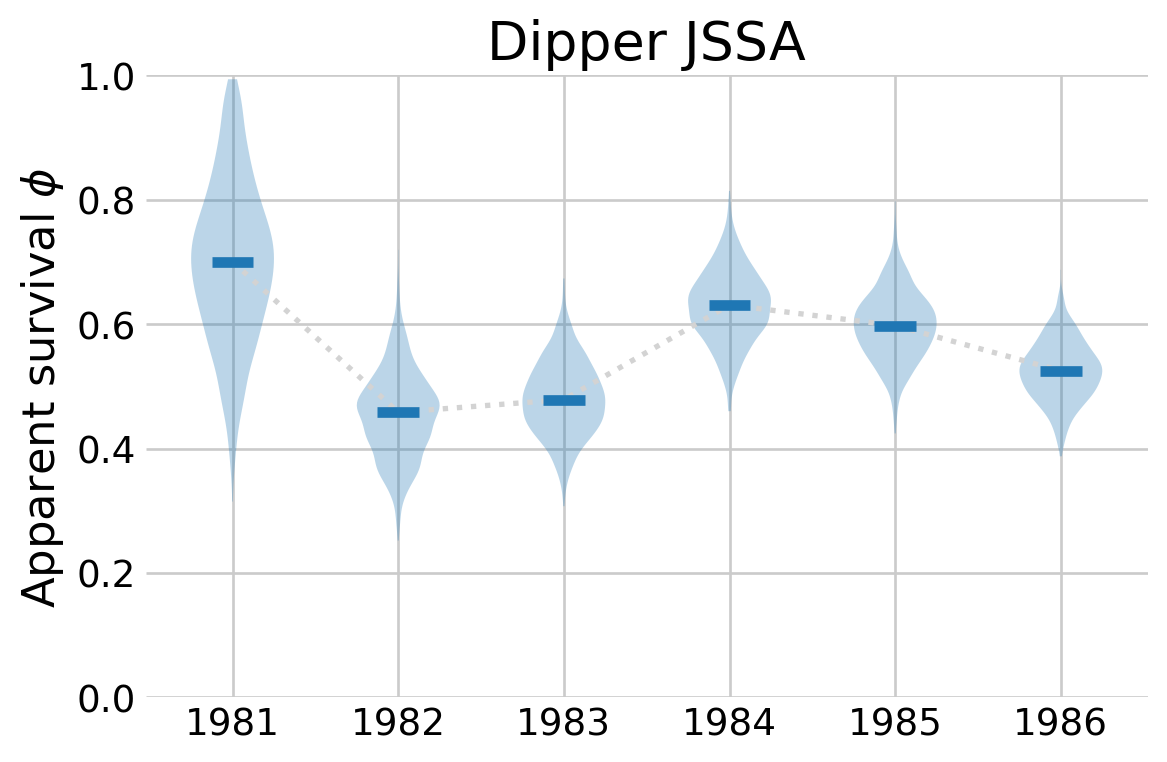

In [18]:
samples = mcmc.get_samples(group_by_chain=False)

fig, ax = plt.subplots(figsize=(6,4))

t = np.arange(1981, 1987)

phi_samples = samples['phi']
phi_median = np.median(phi_samples, axis=0)

ax.plot(t, phi_median, linestyle='dotted', color='lightgray', linewidth=2)
ax.violinplot(phi_samples, t, showmedians=True, showextrema=False)

ax.set_ylim((0,1))

ax.set_ylabel(r'Apparent survival $\phi$')
ax.set_title(r'Dipper JSSA')

plt.show()